In [77]:
import sys

MYSITEPACKAGES = "/kaggle/input/dsml-20/"
sys.path.insert(0, MYSITEPACKAGES)
print(sys.path)

['/kaggle/input/dsml-20/', '/kaggle/input/dsml-20/', '/kaggle/input/dsml-20/', '/home/feanor/Prog/mine/kaggle/survey-2020/notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/feanor/Prog/mine/kaggle/survey-2020/.venv/lib/python3.7/site-packages', '/home/feanor/Prog/mine/kaggle/survey-2020', '/home/feanor/Prog/mine/kaggle/survey-2020/.venv/lib/python3.7/site-packages/IPython/extensions', '/home/feanor/.config/ipython']


In [78]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [79]:
import os
import sys
from typing import Any
from typing import Dict
from typing import List
from typing import Optional
from typing import Union

import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.display import display, HTML
from IPython.lib import deepreload

import os
import sys

from IPython.lib import deepreload

import kagglelib as kglib

# https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print
class disabled_print:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python
def reload_kglib() -> None:
    with disabled_print():
        deepreload.reload(kglib, exclude={key for (key, value) in sys.modules.items() if "kagglelib" not in key})

np.set_printoptions(linewidth=200)
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

udf = kglib.load_udf()
uds = kglib.load_role_df(udf, role="Data Scientist")
fdf = kglib.filter_df(udf, print_filters=False)
fds = kglib.load_role_df(fdf, role="Data Scientist")
udf, uds, fdf, fds = map(kglib.keep_demo_cols, (udf, uds, fdf, fds))

# State of Machine Learning and Data Science 2020, Revisited

## Table of Contents

1. Methodology
2. Creating a global average salary dataset
2. Exploring "data pollution", spam and user error
3. Data Scientists' Profile
4. Data Scientists' Programming and ML Experience
5. Data Scientists' Salary
6. Impact of Experience on DS Salaries
7. Conclusion
8. Appendix A: Data cleaning methodology, assumption, datasets
9. Appendix B: Dedicated library and reusable code functions
10. Appendix C: Exploring Q & A; suggestions for future Surveys

## Introduction

The Kaggle DS & ML Survey is an open online survey receiving thousands of responses from all over the world, offering unique insights. This analysis tries to achieve the following goals:

- the identification of spam data, which is a fundamental principal method and goal of Exploratory Data Analysis (EDA).
- examining the profile of Data Scientists with an emphasis on the subject of compensation.

The Kaggle DS & ML Survey being a global online survey is affected by factors that Machine Learning is often used to mitigate: *spam* and *user error*. According to the Survey Methodology, *spam* has already been excluded from the data. Nevertheless, using Exploratory Data Analysis (EDA) we find that a large part of the data should be removed from the dataset for being spam or for having abnormal, irregular values. Using relatively lenient criteria we manage to remove such observations without dropping possible outliers.  

Our analysis comprises the following unique features:

- Filtering the data, which is a principal feature and a goal in itself.
- Comparing the filtered dataset with the Unfiltered one in order to provide additional insights.
- Grouping countries according to the World Bank "Income Groups" definition to account for the wide economic diversity.
- Reconstructing the various classes (bins) in which the data are provided to account for their width and their underlying properties.
- Excluding USA and India from global or group aggregates, thus offering a alternative view on the pronounced symmetric differences.

Combining these features, our results diverge to a large extend from the "Executive Summary", and all other analyses that do not filter the data, especially with respect to our focus, the issue of employees' compensation levels. Our findings add to the understanding of the data, providing information to students, professionals and interested companies in order to optimize their strategical behavior with respect to compensation, relocation and remote work. 

The key findings are:

- There are at least 3861 observations (19.3% of the dataset) than need to be removed, of which 596 "Data Scientists" (22.3% of the subset).
- Data Scientists tend to hold, or aim for, higher academic degrees compared to what the unfiltered data shows.
- Median salaries are significantly higher and salary distribution is shifted towards higher ranges. For example, the median salary for Data Scientists in India is double than what the unfiltered data suggest.
- The age distribution density is much higher in younger ages compared to what the unfiltered data shows..
- US-based data scientists are more experienced, while for the same levels of experience, they earn almost double compared to their colleages in other high income countries.
- The Data Scientist's salary increases significantly with Coding and Machine Learning Experience.

The contributions of our work are:

- A fundamentally different methodological framework on the issues of data filtering, observations aggregation and observations decomposition.
- The combination of several economic databases to create a new dataset that proxies the average salary in most countries of the world.
- The creation of a dedicated python library that makes our analysis reproducible, easy to parametrize and allows exploring different dimensions of the dataset using the afore-mentioned methodology.

## 1. Methodology

### a) Examining Survey questions, answer choices and data

The first part of our EDA is dedicated to exploring abnormal/invalid observation values that have not be flagged as spam by the survey system, but should be definetely removed from the dataset. We use the Kaggle *Executive Summary* as a "benchmark", but our results also differ from all other EDAs that explore the data without filtering them first.

The number of unacceptable values and the criteria that we had to set, highlight the principal importance and challenges of exploring the data for errors and cleaning them before embarking on any other kind of analysis.  Besides unacceptable values, we find mispecifications in "Questions" and "Answer Choices" that may lead to unfounded conclusions.

### b) Adjusting for cross-country economic differences

The importance of meaningful information on compensation levels cannot be understated in a field that transcends national borders like few others.  Nevertheless, the differences among different economies are so profound that a global view on Data Scientist salary distribution shows an "everything goes" result.

Besides calculating a more representative salary median for each country, we group the countries according to the World Bank Income Groups and explore the salary distribution per group of countries. This allows us in turn to explore in a meaningful way the effect that experience levels have on salary in each income group. We find that _experience_ influences salary levels and leads to significant within-group differences.

### c) Reconstruction of data aggregated bins (classes)

The survey uses different classes width for various dimensions (e.g. age, salary and experience).
This is informative and convenient for aggregating observations but comes with a trade-off; a large amount of information is lost.  Unequal bins size leads to "over" or "under" representation of data, depending on the relative width difference and the number of observations.  It may  also distort information and create "illusions" in visual representations. Therefore, we reconstruct bins when necessary and gain new and useful information.

### d) USA versus Rest of World (RoW) symmetric difference comparison

When comparing the aggregate metrics of a subset of the data with the overall aggregates we examine whether the subset in question influences heavily the aggregated values.  It is often informative to compare a subset with low number of observations against the total, to asses how it measures against it.  On the contrary, if a subset has substantial weight, then information is distorted since the subset affects the total to a significant degree.  In that case, comparing the symmetric difference adds valuable information. Therefore, when comparing the USA, or India we exclude it from the total.

## 2. Creating a global average salary dataset

To examine whether there exist observations with extremely low salary values we had to define what consitutes a "low" salary for each country. 

Since salaries in each country vary significantly, we need to use a different rejection threshold. Besides Eurostat, we found that International Organizations' databases on average salaries contain missing our outdated values for a large number of countries. Therefore, we combine data from seven different sources to obtain an *approximation* for the annual average salary of each country (`country_avg_salary`) and cross-validate our selection.

More specifically, we used:

- the official average salary data from Eurostat for the European Union countries and the United Kingdom (UK).
- the World Bank Gross National Income per capita value (GNI pc), which is the measure used by the World Bank to define country "Income groups" for all the remaining countries.  

We compared these values with:

- the WB "Income Groups" for countries.
- the WB Gross Domestic Product per capita (GDB pc).
- the Organization for Economic Cooperation and Development (OECD) average salary data.
- the International Labour Organizaton (ILO) average salary data.
- unofficial data from "numbeo.com".

The various datasets we examine, the dedicated function and the average salary that we use for setting filtering threshods are shown below. Readers are kindly encouraged to inspect interactively the average salary we select for any country.

In [80]:
dataset = udf
salary_comparison_df = kglib.load_mean_salary_comparison_df()
survey_countries = list(dataset.country.unique())
survey_salary_comparison = salary_comparison_df[salary_comparison_df.country.isin(survey_countries)]
survey_salary_comparison[survey_salary_comparison.country.isin(["USA", "India", "UK", "Brazil", "France", "Germany", "Spain"])]                                  

,country,income_group,eurostat,wb_gni_pc_atlas,wb_gdp_pc,oecd_ppp,ilo,numbeo,country_avg_salary
26,Brazil,2. Upper middle,NaN,9130.0,8717.186278,NaN,8766.0,4215.24,9130
68,France,3. High,40914.646375,42450.0,40493.928572,46480.615399,39699.6,29010.36,40914.6
73,Germany,3. High,58420.771650,48580.0,46445.249101,53637.801603,59108.4,33441.96,58420.8
89,India,1. Lower middle,NaN,2120.0,2099.599048,NaN,NaN,5375.88,2120
179,Spain,3. High,30827.962570,30390.0,29600.378253,38757.569961,28357.2,18931.92,30828
206,UK,3. High,52039.453725,42220.0,42330.117537,47226.087660,36156.0,30416.76,52039.5
207,USA,3. High,NaN,65850.0,65297.517508,65835.577645,50797.2,42706.20,65850


## 3. Exploring "data pollution", spam and user error

The aspects we investigated are:

- Extreme submission time
- Participants who did not actually participate in the survey.
- Criteria based on combinations of mutually exclusive values in age, experience, country and salary we remove observations reporting:
    - Too young and too high experience.
    - Too high salary and too young.
    - Too high salary and too low XP.
    - Too low salary for country of residence.
    - Too low salary and too high XP for country of residence.

### Extreme Submission time

In [81]:
dataset = udf
seconds = [30, 45, 60, 90]
super_fast_participants = pd.DataFrame(
    {
        "seconds": seconds,
        "fast_participants": [len(dataset[dataset.duration <= sec]) for sec in seconds],
    }, 
)
# super_fast_participants

fastest = dataset.duration.nsmallest(1).values[0]
fastest_time_n = dataset.duration.nsmallest(300).tail(1).values[0]
slowest = dataset.duration.nlargest(1).values[0]
slowest_time_n = dataset.duration.nlargest(300).tail(1).values[0]
# fastest, fastest_time_n, (slowest/3600),  (slowest_time_n/3600)
# 
# (dataset.duration <= 3000).sum()
# dataset[dataset.duration < 3000].duration.hist(bins=200, grid=False)
# dataset.duration.median()
# dataset.duration.mean()

There are 347 participants that completed the survey in less than 60 seconds.  That is arguably not enough time to read (up to) 35 questions.

| threshold (sec) | No. participants |
|-----------------|------------------|
| 30              |  29              |
| 45              | 166              |
| 60              | 347              |
| 90              | 630              |


- The fastest "participation" time is 20 seconds.
- The 300th faster is 56 seconds, meaning that 300 participants "completed" the Survey in 56 seconds or less.  
- The slowest survey completion time is 318 hours (almost two weeks).
- The 300th slowest time is 48 hours, i.e. 300 participants "completed" the Survey in more than two days.  

We could set a reasonable minimum and maximum duration threshold, but doing so is quite subjective. Furthermore, after applying the rest of our criteria a large part of these extreme values are removed and consequently we chose not to include duration in our filters.

### Participants who did not actually participate in the survey.

In [82]:
# udf.columns[:7].values
orig_df = kglib.load_orig_kaggle_df()
temp_df = orig_df.iloc[:, 7:]

only_answer_demographic = (
    (temp_df == 'None')
    | temp_df.isnull()
).all(axis=1)

#len(orig_df[only_answer_demographic])

The dataset includes observations with answers only on general demographic questions, which do not add any value concerning DS & ML, apart from their interest to participate in a kaggle survey. We drop these observations as irrelevant to the scope of our analysis.

We contemplated dropping observations who gave (up to) three additional answers, but decided to drop only the ones with answers on demographic questions plus the next one, and subsequnetly quit the survey.

Using this criterion, we identify and drop 1082 observations. Note that, omitting this criterion does not affect our results with respect to salary levels.

### Too young and too high experience

Undoubtly, it is impossible to be 24 years old or less, and have 20+ years of experience, we we remove such observations from the data.

Some examples of this criterion are:

In [83]:
dataset = udf
is_too_young_for_experience = (
    (dataset.age <= "24")
    & (dataset.code_exp == "20+")
)
dataset[is_too_young_for_experience].iloc[:,1:8].sample(3, random_state=0)

,age,gender,country,education,role,code_exp,ml_exp
10535,22-24,Man,Brazil,Bachelor’s,Software Engineer,20+,0-1
6147,18-21,Man,Turkey,Bachelor’s,Machine Learning Engineer,20+,0
4103,18-21,Nonbinary,Other,No answer,Currently not employed,20+,NaN


### Too high salary and too young

We assume that it is impossible to be less than 24 years old, work as an employee (for a salary) and earn above 300,000 usd yearly, in any country in the world. 


A closer examination reveals that these particular participants spam answers extensively:

In [84]:
dataset = udf
too_young_high_salary = dataset[
    (dataset.age <= "24")
    & (dataset.salary.isin(["300000-499999", "500000-999999"]))
].dropna(axis=1).head()
too_young_high_salary.iloc[:,1:11].sample(3, random_state=0)

,age,gender,country,education,role,code_exp,employees,team_ds,company_ml_use,salary
543,18-21,Man,India,Bachelor’s,Data Scientist,0-1,0-49,0,"We have well established ML methods (i.e., mod...",300000-499999
39,18-21,Man,India,Bachelor’s,Data Scientist,3-5,0-49,20+,"We have well established ML methods (i.e., mod...",500000-999999
364,22-24,Man,India,Bachelor’s,Data Scientist,1-2,0-49,1-2,"We recently started using ML methods (i.e., mo...",500000-999999


### Too high salary and too low XP

We assume that in this field, having zero or minimum coding or ML experience does not allow moving to top salary levels. Therefore, any participant reporting up to 2 years of Coding or ML experience and salary higher than 300,000 usd is filtered out.

A close examination shows that some participants are serial spammers and other might have enter values in Local Currency Units. In any case, such values affect the results significantly and should be removed.

In [85]:
dataset = udf

low_exp_bins = ["0", "<1", "1-2", np.nan]
too_low_exp_too_high_salary = dataset[
    (dataset.ml_exp.isin(low_exp_bins))
    & (dataset.code_exp.isin(low_exp_bins))
    & (dataset.salary.isin(["300000-499999", "500000-999999"]))
]

too_low_exp_too_high_salary.iloc[:,1:12].sample(3, random_state=0)

,age,gender,country,education,role,code_exp,ml_exp,employees,team_ds,company_ml_use,salary
9576,22-24,Man,India,Studies without a,Machine Learning Engineer,1-2,1-2,0-49,0,We are exploring ML methods (and may one day p...,300000-499999
1101,18-21,Self-describe,Other,Doctoral,Other,0,NaN,10000+,0,I do not know,500000-999999
6282,25-29,Man,Thailand,Master’s,Data Scientist,0,NaN,250-999,1-2,We are exploring ML methods (and may one day p...,500000-999999


### Too low salary for country of residence

It trivial to assume that it is impossible to reside in the USA and earn less than \$1000 USD per year in this field. Such observations are shown in the table below:

In [86]:
dataset = udf

USA_too_low_salary = dataset[
    (dataset.country == "USA")
    & (dataset.salary_threshold <= 1000)
].dropna(axis=0)

USA_too_low_salary.iloc[:,1:12].sample(3, random_state=0)

,age,gender,country,education,role,code_exp,ml_exp,employees,team_ds,company_ml_use,salary
557,70+,Woman,USA,Doctoral,Data Scientist,20+,0-1,0-49,0,We are exploring ML methods (and may one day p...,0-999
2824,70+,Man,USA,Master’s,Other,20+,0-1,0-49,1-2,I do not know,0-999
11493,35-39,Man,USA,Studies without a,Other,10-20,1-2,50-249,0,No (we do not use ML methods),0-999


Nevertheless, for setting a "too low salary" condition we need to adjust the salary thresholds for each country. This cannot be done using the data as is, since they contain significant bias by unacceptable values. Additionally, aggregated salary values in bins by default, was convenient for participants, but missed a large part of useful information.

Therefore, we use the average salary approximation `country_avg_salary` from the dataset we presented in the previous section.  

Despite the intuition that "in average", salaries in this field are higher than the general country average and the Gross National Income pec capita, we set the rejection threshold significantly lower than the average salary of each country. More specifically, in order to avoid excluding outliers we:
   
- Calculate the country adjusted `too_low_salary` rejection threshold by:
    - multiplying the country `average_avg_salary` by 0.4 and
    - selecting the rejection rate to be two bins below the above result. This does not take into account that threshold sizes are unequal, resulting in relatively lower rejection thresholds for countries with higher average salary.

E.g. in the USA the average salary is 66850 USD, multiplied by 0.4 equals 26320. The `too_low_salary` rejection threshold skips two bins (the 25-30k bin and 20-25k bin) and is set at 20,000 USD. Any observation for USA and salary value in any bin below 20,000 USD is removed from the data.  

By multiplying the country average by 0.4 and setting the relection threshold two thresholds below, we add two extra buffers to account for:

- participants which may not be 100% full-time employeed,
- possible overestimation of the country average salary on our side,
- possible high salary variance in some coutries.

We acknowledge that there might be limited exceptions in "Low Income Group" countries where Data Scientists and other professionals in the survey may earn less than 1000 USD pe year, but after examining closely the survey data and the average salary data we set the lower `too_low_salary` rejection at 1000 USD for all countries. De discuss this decision with detail in Appendix A. Our _approximation_ for the `too_low_salary` may not always be perfectly accurate, still, the results are orders of magnitude more accurate than making inferences by using the data as is.

### Too low salary and too high XP for country of residence

After examining salary in combination with experience, we find many observations which report very high experience and too low salary for that level of experience.

It is trivial to assume that residing and working in the US, having more than 10 years of Programming experience and earning less than 1000 USD per year, makes even less sense than earning only 1000 USD per year. Such observations, PhD holders among them, are shown in the table below:

In [87]:
dataset = udf
country = "USA"
high_exp_bins = ["10-20", "20+"]

is_high_exp = (
    dataset.code_exp.isin(high_exp_bins)
    | dataset.ml_exp.isin(high_exp_bins)
)

USA_too_low_salary_high_exp = dataset[
    (is_high_exp) &   
    (dataset.salary_threshold <= 1000)
    & (dataset.country == country)
]

USA_too_low_salary_high_exp.dropna(axis=0).iloc[:,1:12].sample(3, random_state=0)

,age,gender,country,education,role,code_exp,ml_exp,employees,team_ds,company_ml_use,salary
12114,50-54,Man,USA,Master’s,Business Analyst,10-20,4-5,1000-9999,20+,"We have well established ML methods (i.e., mod...",0-999
2735,60-69,Man,USA,Doctoral,Statistician,20+,2-3,0-49,0,No (we do not use ML methods),0-999
11051,50-54,No answer,USA,Doctoral,Research Scientist,20+,20+,10000+,20+,"We have well established ML methods (i.e., mod...",0-999


Again, we assume that the average salary in the field is higher than the general country average and that those with high Programming or Machine Learning experience earn more that the sector average, and considerably more than the general average.

Despite our assumption, in order to:
    
    - avoid dropping outliers,
    - adjust for possible high salary variance and,
    - adjust for cross-country differences, we set:

- the country-adjusted `low_salary_high_exp` threshold, to be two thresholds below each `country_avg_salary`, applicable only for experience values greater than 10 years.

E.g. in the USA the average salary is 66850 USD. The `low_salary_high_exp` rejection threshold skips two bins (the 60-70k bin and the 50-60k bin) and is set at 50,000 USD. Any observation for USA with experience greater than 10 years and salary value in any bin below 50,000 USD is removed from the data. This we assume is too low for very highly skilled Professionals, compared to the general average salary in the US, even more so to the average salary in the field.

To sum up, using lenient rejection criteria, we set three distinct rejection thresholds related to salary levels:

- `too_low_salary`
- `low_salary_high_exp`
- `high_salary_low_exp`

To investigate how these three thresholds work and fit with the data, we have created a dedicated function and as shown in the table below. Readers are kindly encouraged to inspect interactively the thresholds salary we set for any country. 

In [88]:
dataset = udf
thresholds_df = kglib.load_thresholds_df()
survey_countries_list= dataset.country.unique()
survey_thresholds_df = thresholds_df[thresholds_df.country.isin(survey_countries_list)]
# survey_thresholds_df
usa_threshold = survey_thresholds_df[survey_thresholds_df.country == "USA"]
# usa_threshold
countries = ["USA", "India", "UK", "Brazil", "France", "Germany", "Spain"]
countries_thresholds_df = survey_thresholds_df[survey_thresholds_df.country.isin(countries)]
countries_thresholds_df

,country,income_group,country_avg_salary,too_low_salary,low_salary_high_exp,high_salary_low_exp
26,Brazil,2. Upper middle,9130,2000,5000,500000
68,France,3. High,40914.6,10000,30000,500000
73,Germany,3. High,58420.8,15000,40000,500000
89,India,1. Lower middle,2120,1000,1000,500000
179,Spain,3. High,30828,7500,25000,500000
206,UK,3. High,52039.5,15000,40000,500000
207,USA,3. High,65850,20000,50000,500000


# 3. Data Scientists Demographic Profile

## No. of participants
As mentioned in the introduction, after filtering the data, we drop 3861 (19.3%) observations from the dataset  and 596 (22.3%) observations from the Data Scientists subset.

In [89]:
# (len(uds) - len(fds))/len(uds)

pd.DataFrame({
    "Dataset": ["Unfiltered", "Filtered", "Unfiltered DS", "Filtered DS"],
    "No. Participants": [len(udf), len(fdf), len(uds), len(fds)],
})

,Dataset,No. Participants
0,Unfiltered,20036
1,Filtered,16175
2,Unfiltered DS,2676
3,Filtered DS,2080


## Gender

Men percentage is 1% higher compared to the unfiltered data.

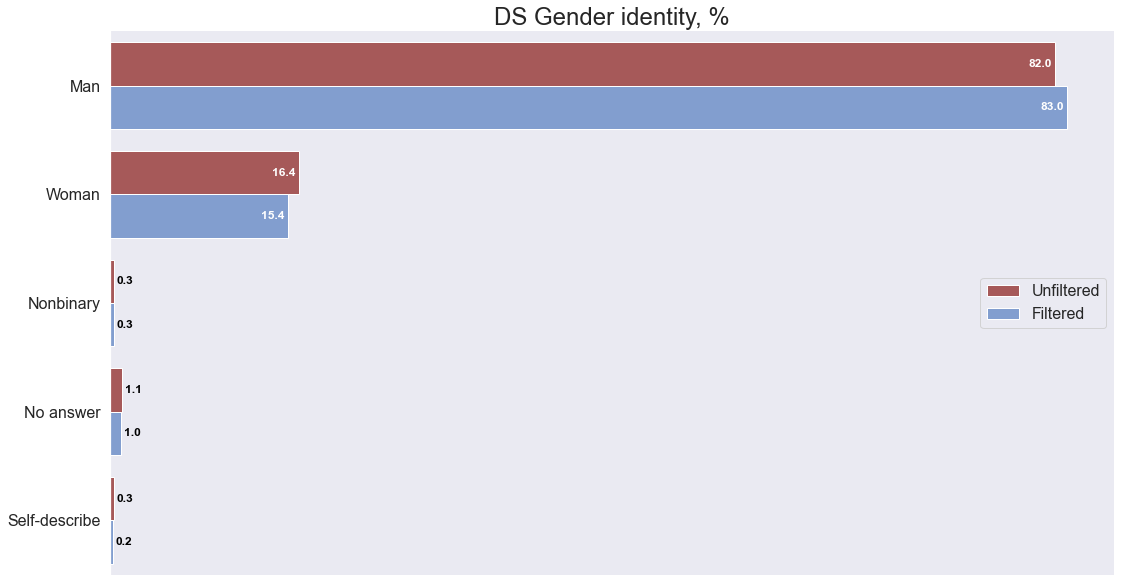

In [90]:
dataset1, dataset2 = uds, fds
column = "gender"
df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="No. participants",
    as_percentage=True,
    order=["Man", "Woman", "Nonbinary", "No answer", "Self-describe"],
)
# df

kglib.sns_plot_value_count_comparison(
    df=df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    legend_location="center right",
    title="DS Gender identity, %"
)

## Age

Data scientists in the workplace, in the age of 18-21, are not that many after applying the filters. Nevertheless, more than 60% of Data Scientists are below the age of 35.

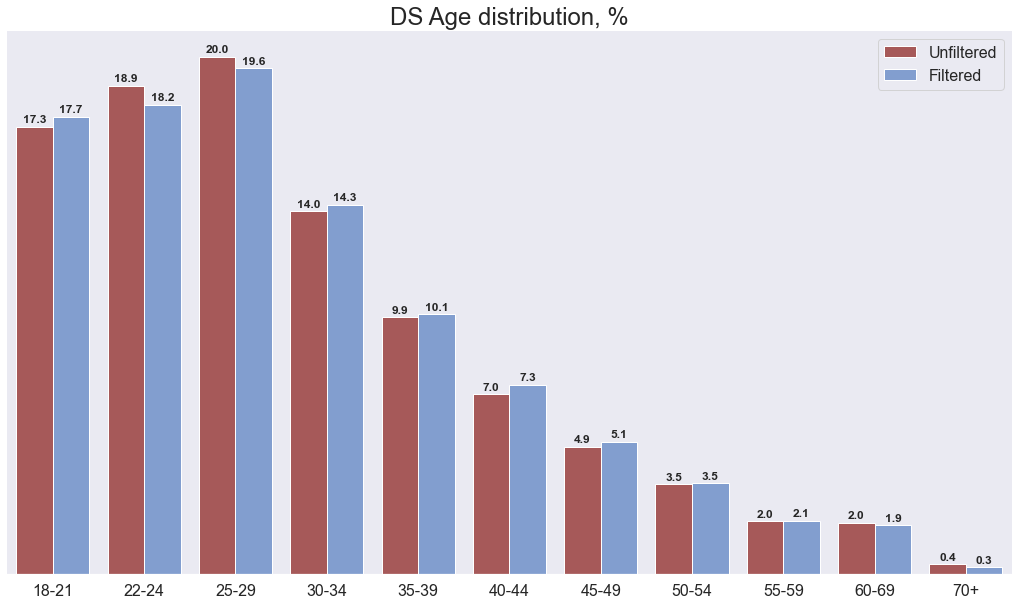

In [91]:
dataset1 = udf
dataset2 = fdf
column = "age"
df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="No participants",
    as_percentage=True
)
# df
kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="v",
    title="DS Age distribution, %"
)

### Examining Survey Age bins

There is something more interesting concerning the whole survey distribution if we examine the bin widths.  

The age bin of `18-21` spans over 4 years, the bin `22-24` over 3 years, and the `25-29` bin spans over 5 years. This ad hoc bin creation is informative if you focus on any of these bins separately, but distorts the comparison between the three. Consequently, the relative size of the `18-21` bin is by definition augmented, while the `22-24` bin is by definition much smaller than the `25-29` bin.

Assumming, for simplicity, that the number of participants per year is constant in bin `18-21` and adjusting the bin widths the distributions changes.

More specifically, by adjusting the bin widths, we find that in the `20-24` cohort there are 30% more participants than in the `25-29` cohort.

Another interesting finding is that the average number of participants per year is higher by 10% in the `18-21` cohort compared to the `25-29` one, showing that Kaggle is way more popular to "newcomers" in Data Science.

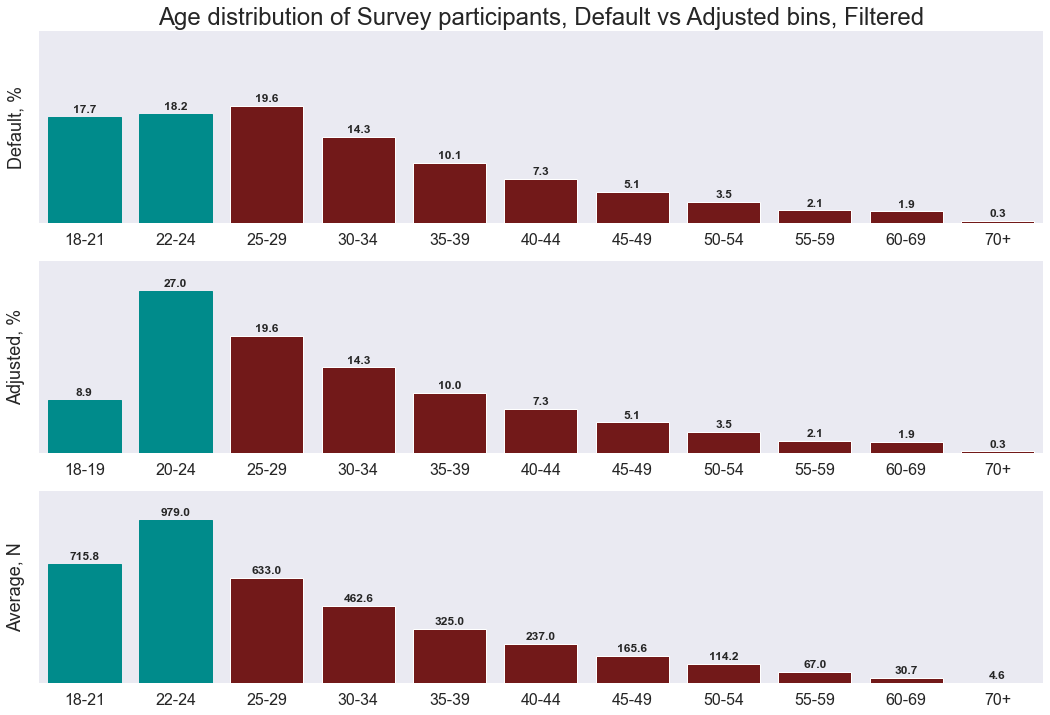

In [92]:
dataset = fdf
kglib.sns_plot_age_distribution(
    dataset,
    width=18,
    height=12,
    title="Age distribution of Survey participants, Default vs Adjusted bins, Filtered"
)

#for unfiltered data we set:
# dataset = udf
# kglib.sns_plot_age_distribution(dataset, width=14, height=8,title="Age distribution of Survey participants, Default vs Adjusted bins, Uniltered data")

## Country

When comparing filtered and unfiltered data, concerning the number of participants:

- The difference between USA and India is less pronounced.
- The UK is third in terms of participants.
- The Netherlands are included in the top 15 countries while Nigeria is not.

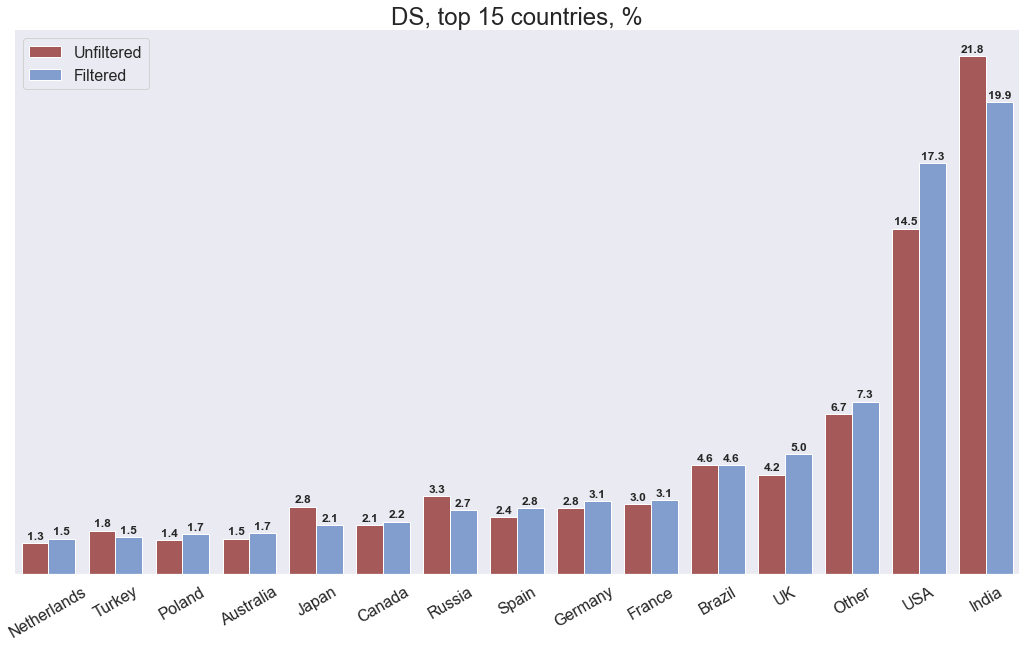

In [93]:
dataset1, dataset2 = uds, fds
column = "country"
df = kglib.get_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    as_percentage=True
)

df = df[df.Filtered > 1.48]
df = df.sort_values(by="Filtered")
df = kglib.stack_value_count_comparison(df, "participants (%)")

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="v",
    order_by_labels=False,
    x_ticklabels_rotation=30,
    title="DS, top 15 countries, %"
)

## Education

Interestingly, after filtering the data, "possible" PhD holders increase by more than 13.5%,
reaching the 20% of the total population.  Combined with the fact that the Masters also increase slightly and that Bachelors decrease by around 13% we find that Bachelors and PhD distribution is almost equal for Data Scientists.

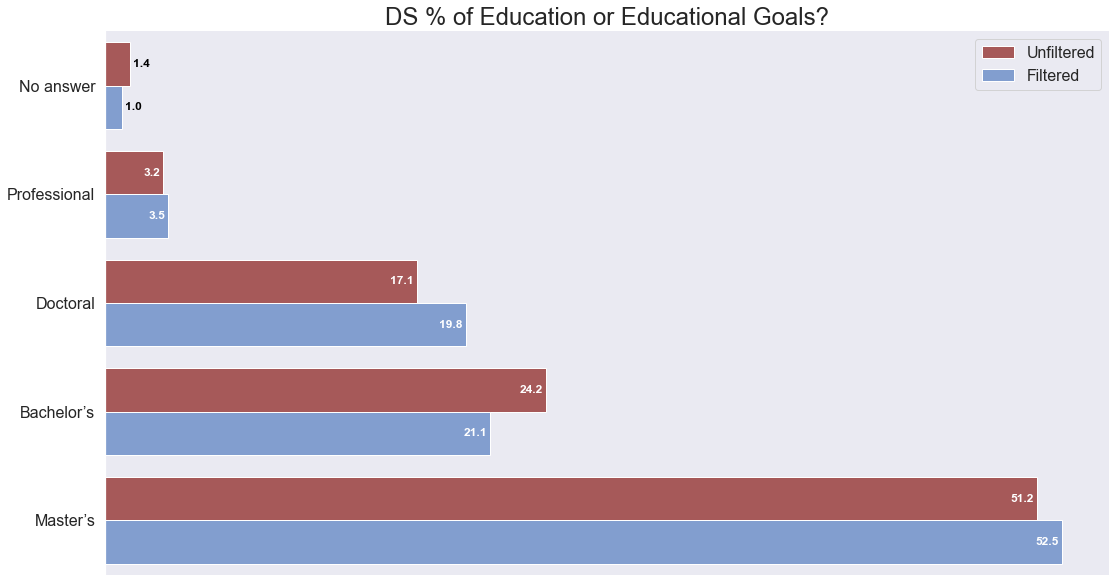

In [94]:
dataset1, dataset2 = uds, fds
column = "education"
order = [
    'No answer',
    'High school'
    'Studies without a degree',
    'Professional',
    'Doctoral',
    'Bachelor’s',
    'Master’s',
]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    stack_label="participants (%)",
    as_percentage=True,
    order=order,
)
# df

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    title="DS % of Education or Educational Goals?"
)

#### Examining the questions asked:

There is another important discovery though.

The question about education is posed in a way that does not allow for definite inferences about the current level of education of participants.  

In [95]:
kglib.load_questions_df().iloc[4]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

Even if "Data Scientists" are not "Students", we can not be 100% certain whether they replied about the level of education they have already attained or about the one they plan to attain.  

Therefore, we exclude this dimension from our analysis on salaries as any EDA based on information provided by it would be unfounded.

# 4. Data Scientists Programming and ML Experience

### Programming Experience - USA vs RoW

#### Unfiltered dataset

Using the unfiltered data and excluding the US from the global aggregate we find that:  

- The percentage of Data Scientitsts in the US with more than 20 years of Programming Experience is almost triple than in the RoW.
- More than the two thirds of Data Scientists in the US, have more than 5 years of experience.  
- The shortage of experienced Data Scientists in the RoW is manifested vividly, as more than 60% of Data Scientists in the RoW have less than 5 years of Programming Experience.  

> Ps. There is an error in the "Executive Summary", p.9 plot concerning the USA "20+ years" bin.  
The plot shows 7.6% of participants while the actual unfiltered data value is 17.5%

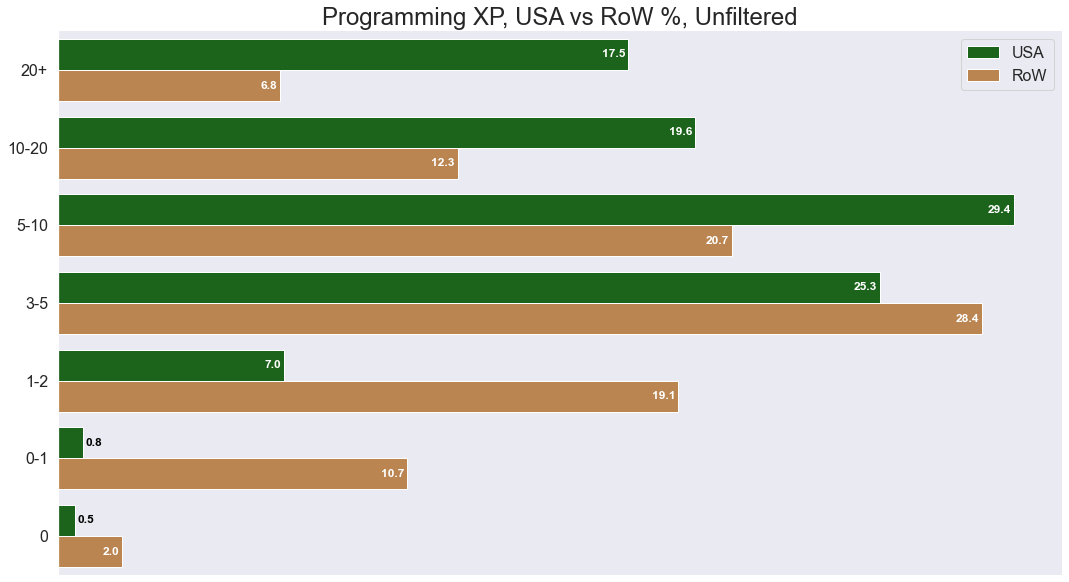

In [96]:
role = "Data Scientist"
country = "USA"
column = "code_exp"
dataset = uds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    title=f"Programming XP, {country} vs RoW %, Unfiltered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

#### Filtered dataset

- The percentage of Data Scientitsts in the US with more than 20 years of Programming Experience is double than in the RoW.

- Similarly to the unfiltered dataset, more than the two thirds of Data Scientists in the US, have more than 5 years of experience.  On the other hand, the shortage of Experienced Data Scientists in the RoW decreases, since more than 50% have less than 5 years of Programming Experience.

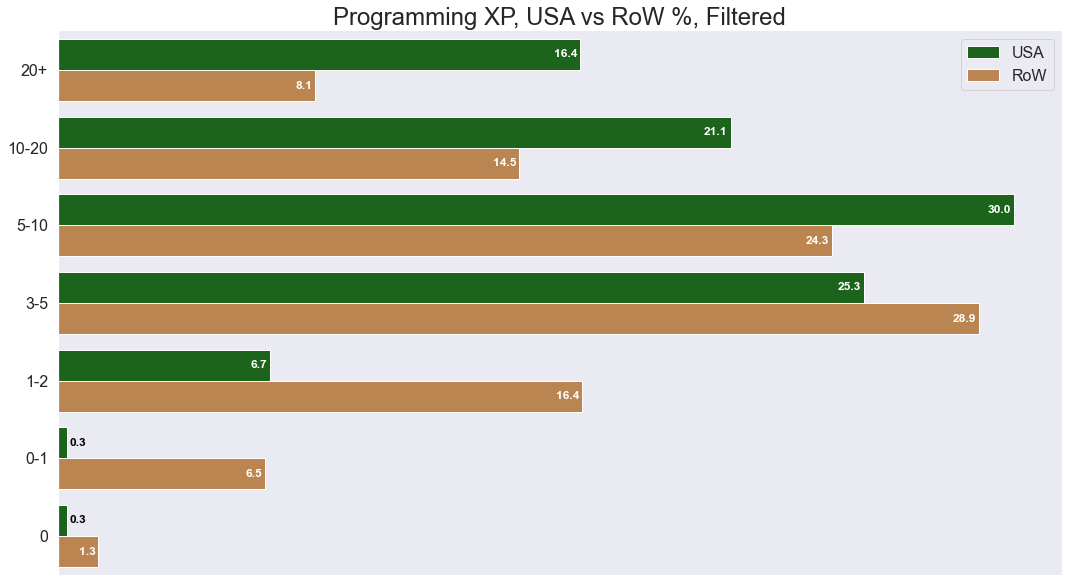

In [97]:
role = "Data Scientist"
country = "USA"
column = "code_exp"
dataset = fds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    title=f"Programming XP, {country} vs RoW %, Filtered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

## Machine learning experience - USA vs RoW

After filtering the data and excuding the USA from the global aggragate, we find that:  

- The relative differences in Data Scientists with experience of more than 10 years is higher compared to the global aggreagares that include the US.

- More than one in three respondents (34.6%) from the US have experience of 10 years or more, versus one in five (20.3%) in the RoW.  

> Ps. There are two errors in the "Executive Summary", p.10 plot.  
> - The bin for "10-15 years" should be "10-20 years".
> - The relative scale for the global bars at the bins of "10-20 years" and "20 or more" has been set to almost zero.

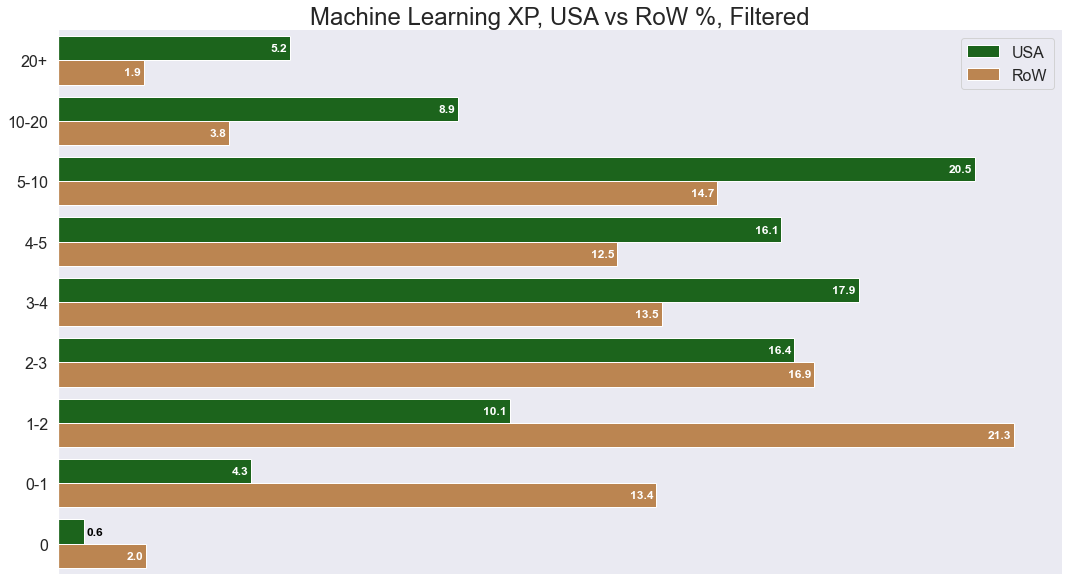

In [98]:
role = "Data Scientist"
country = "USA"
column = "ml_exp"
dataset = fds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    title=f"Machine Learning XP, {country} vs RoW %, Filtered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

Using the unfiltered data but excluding the USA from the global aggregates, we see that: 

- Less than one in 6 respondents have experience of more than 5 years in the RoW (16.3%).  
- There is a relative reduction of around one fourth in the unfiltered versus the filtered data, for the  high experience categories.
- Similarly, only 4.5% of Data Scientists in the ROW have more than 5 years experience in Machine Learning.

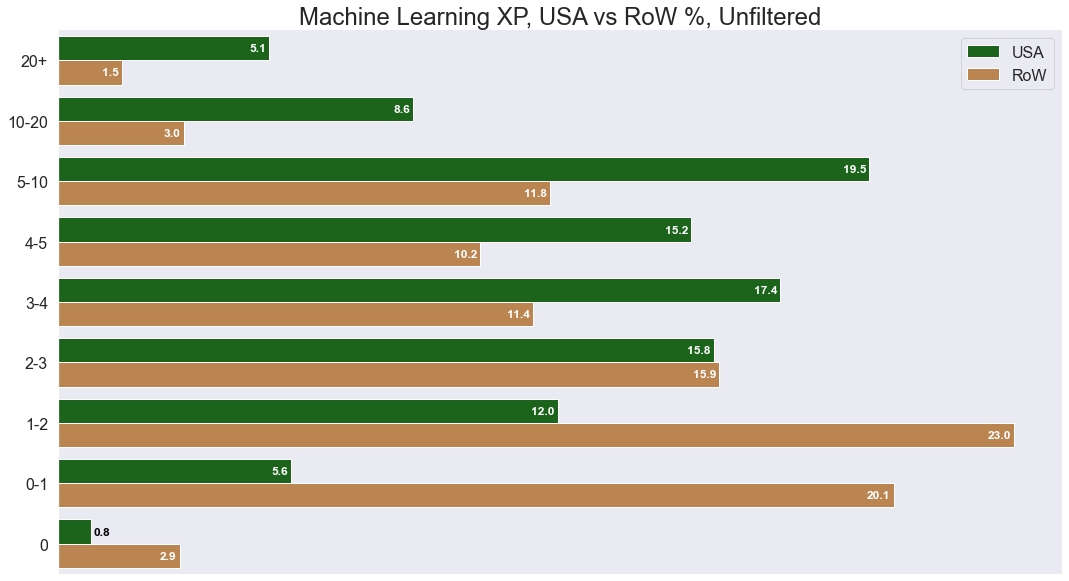

In [99]:
role = "Data Scientist"
country = "USA"
column = "ml_exp"
dataset = uds

dataset = kglib.load_role_df(dataset, role=role)
dataset1 = dataset[dataset.country == country]
dataset2 = dataset[dataset.country != country]

df = kglib.get_stacked_value_count_comparison(
    sr1=dataset1[column],
    sr2=dataset2[column],
    label1=country,
    label2="RoW",
    stack_label="participants (%)",
    as_percentage=True,
    order=natsort.natsorted(dataset[column].unique(), reverse=True)
)

kglib.sns_plot_value_count_comparison(
    df,
    width=18,
    height=10,
    orientation="h",
    order_by_labels=False,
    title=f"Machine Learning XP, {country} vs RoW %, Unfiltered",
    palette=[sns.desaturate("green", 0.75), "peru"],
)

# 5. Salary

## Global Salary distribution

The unfiltered data global salary distribution exhibits an "anything goes" pattern with three slightly higher density modes which are partly related to unequal bin widths. Note that the `100000-124999` bin width is 2.5 times wider than the `90000-99999` bin width.   Similarly, if we construct equal size bins by joining the `7500-9999` and the `5000-7499` bins, we will get higher values than the `10000-14999` bin. Even worse, what literaly sticks out is the `0-999` bin suggesting that almost one in five Data Scientists globaly earn less than on thousand $USD per year.   

Thankfully, this is related to spam, user-error or, possibly, part-time employement values. The picture is not as bleak after filtering the data. The filtered data global salary distribution values increase significantly, _from 25\% to 30\%_, and the density of the three main modes and of their neighboring bins also increases relative to their unfiltered values.  

The three modes indicate hidden patterns in the data resulting in this distribution shape.   Therefore, we examine the salary distribution:  

- of the countries with the higher number of participants in the Survey (USA, India, UK, Brazil). These countries happen to belong in different World Bank Income groups.
- groups of countries according to the World Bank "Income Group" categories. There were no countries in the "Lower" income group in the data. Some participants from countries belonging to this group, might be have been classified in the "Other" country category. Unfortunately, this information is not available to us.

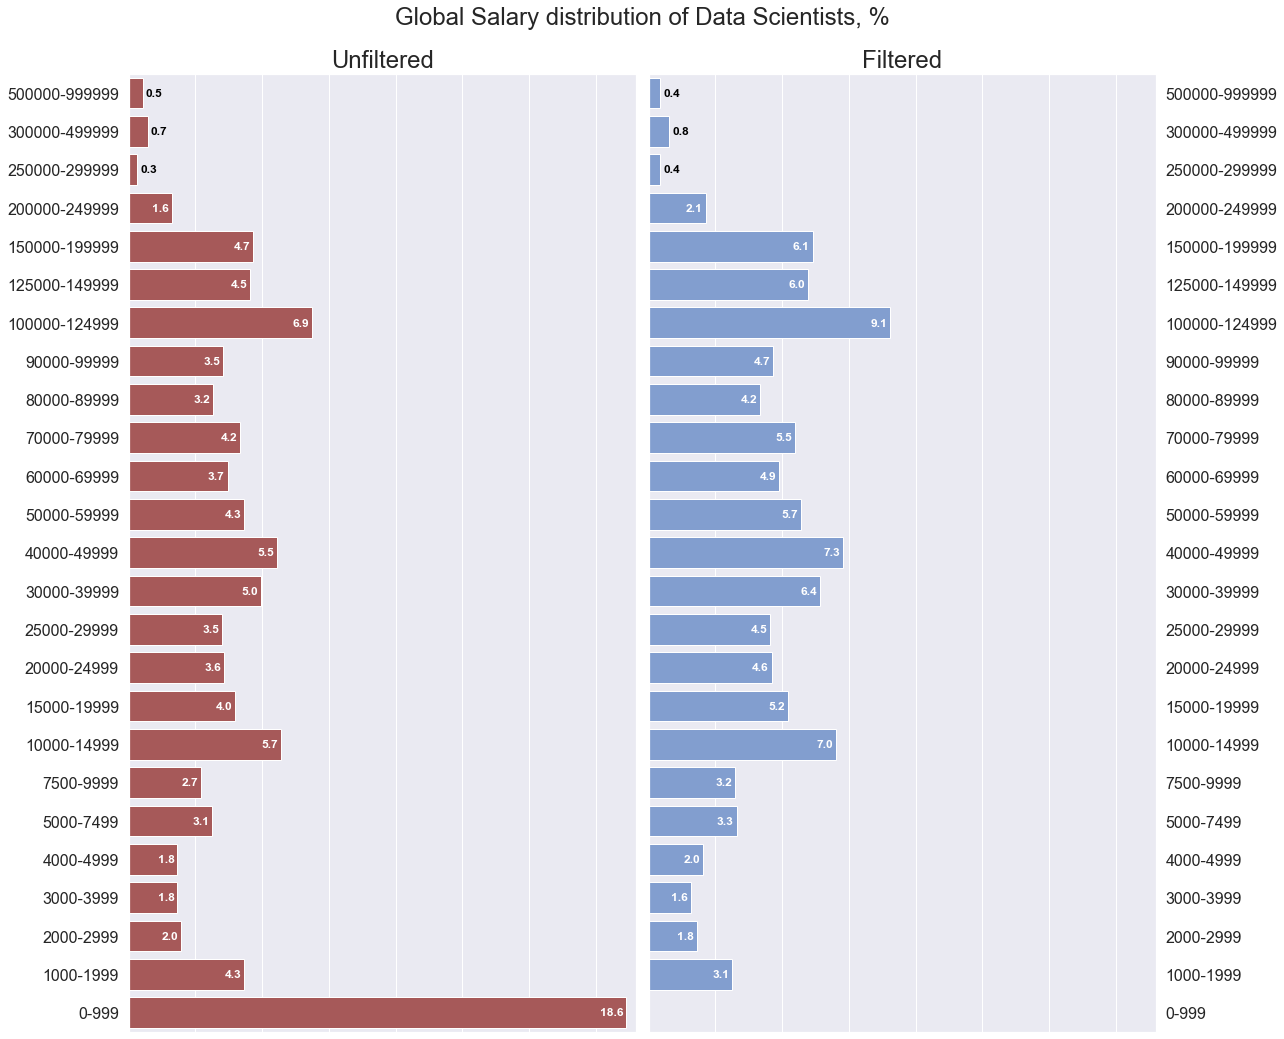

In [100]:
kglib.sns_plot_global_salary_distribution_comparison(
    uds,
    fds,
    width=18, 
    height=14,
    title="Global Salary distribution of Data Scientists, %"
)

## US salary distribution

Examining the filtered data, we get a clearer idea about what to expect working as a data scientist in the US.  We should expect, 97% of the times, a minimum staring salary above 70000.  

We find that the US salary distribution is even more concentrated in the 90k to the 200k range. Resembling one standard deviation analysis without calculating the mean, we find that more than 70% of salary observations are in the 90k to the 200k range. The reason we choose the 90-99k bin instead of the 200-249k bin in order to calculate the cumulative percentage of 70% of observations has to do with the relative bin widths as discussed previously.  

If we combine the bins from 70k to 99k, we get a single bin whose value is ~18.3% and with greater width compared to the 100-125k bin.  Similarly, if we split the 150-199k bin in half, we get two bins of the same width and whose values will be ~11.5%. Using this information we conclude that the mode of the distribution lies in the 100-125k bin, while the median lies in the 125-149k bin.

So, even though most of the observations (23%) are in the 150k-199k range this is an optical illusion. This should be noted so that readers get a better understaning of the data.  

Comparing the mode midpoint (112.5k) that we infer by examing the data and the adjusted bins, we find that the mode mid-point is higher by two thirds compared to the US average salary ($68700). Additionally, the median is approximately double than the average salary.

That information should be kept in mind by all interested parties.

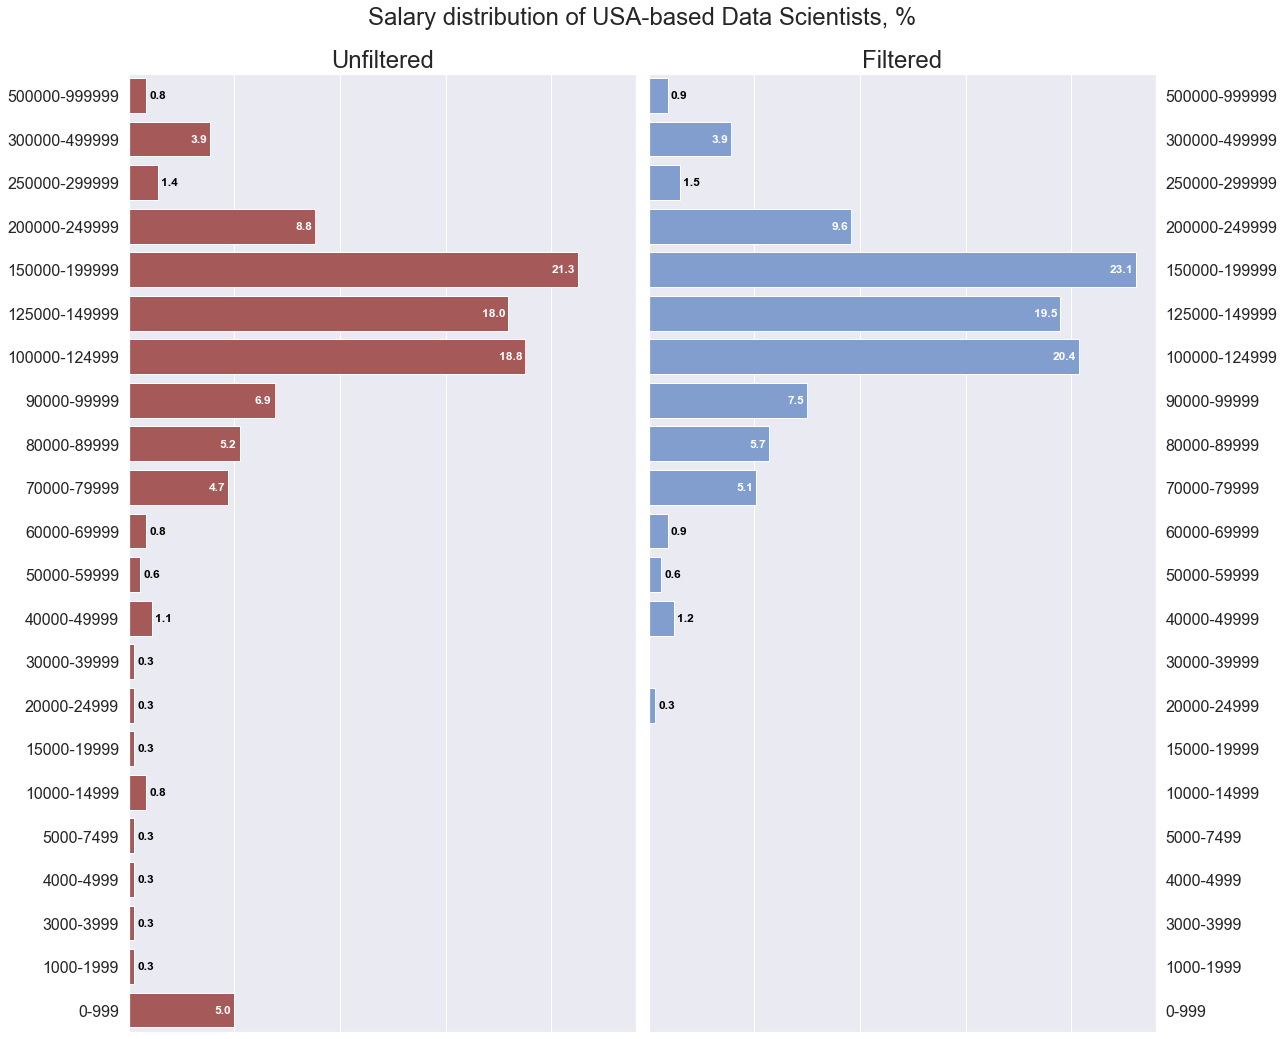

In [101]:
country = "USA"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=18,
    height=14,
    x1_limit=(0, 24),
    x2_limit=(0, 24),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

## India Salary distribution

Being one fifth of the data it is necesary to focus on the Salary distibution of India.

Examining the filtered data, we find that the Data Scientists salary distribution in India spreads out along a wide range of values. As expected, after excluding data that suggested that one third of Data Scientists earn less than 25% of the country average, we can make more reliable inferences. Note that there are no observations in the top salary bins despite setting lenient rejection thresholds. This highlights the importance of filtering criteria that may capture a small part of total data, but nevertheless, play an important role when examining subsets.

Taking into account the unequal bin size we can see that 69.3% of the observations are in the 4k-4999 range. This resonates with the fact the India is classified by the World Bank as a "Lower Middle" income country.  

When we calculate the cumulative percentages of the distribution, we do not include the 40k-49999 bin. Instead, we include the 4k-4999 bin, despite the fact that both bins have similar density. We do so because the 40-49999 bin is 10 times wider. Simalarly, by examining bin widths, we find that the distribution density mode is at the 5k-9999 area (15.7%) including almost 10% more observations than the 10k-14999 bin. Interestingly, the mode bin midpoint (7500) is almost four times larger than the country average salary we use to set the rejection threshold.

This evidence adds support to the general intuition that Data Scentists' salaries are considerably higher than the average country salaries. It also indicates that our salary value rejection criteria were lenient indeed.  As a final note, by examining the filtered data graph, we find evidence that being intentionally lenient, we have allowed a part of non-normal values to remain in the dataset in the 1000-1999 bin. This infulences the salary distribution and indicates that salaries might actually be higher.

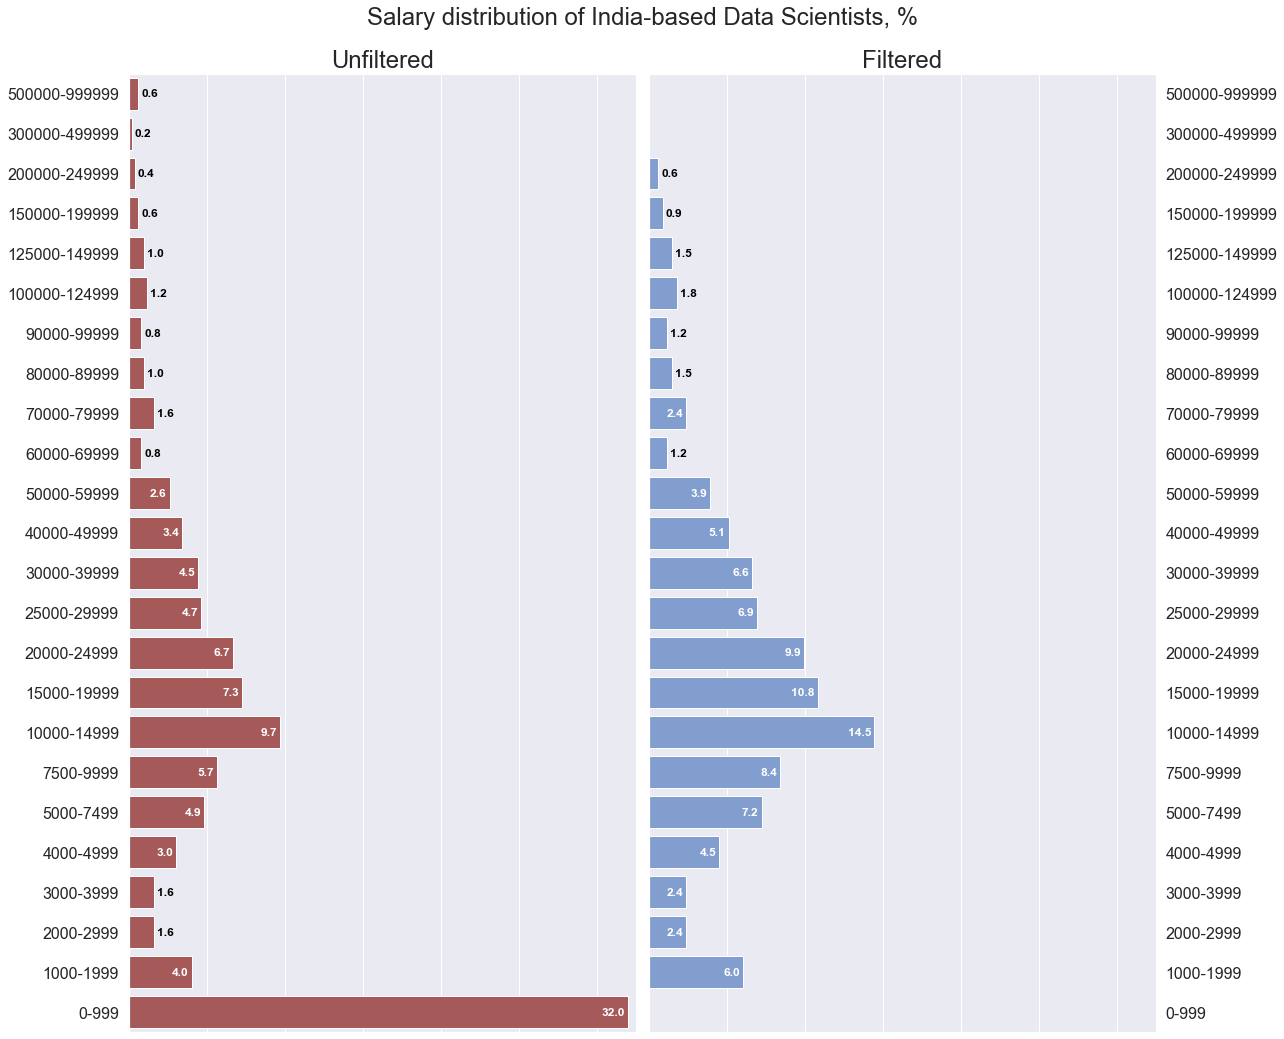

In [102]:
reload_kglib()

country = "India"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=18,
    height=14,
    x1_limit=(0, 32.5),
    x2_limit=(0, 32.5),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

## UK salary distribution

The salary distribution in the UK is also spread out. A closer look reveals that the 150-199k bin sticks out partly due to its relatively large width. Still, 36% of values are above the 100k threshold and there is a two-modal pattern in the distribution.  Despite being classified by the World Bank as a "High Income" country, the UK is actually among the top countries in that category in terms of average salary. Accounting for experience levels could perhaps explain salary differences more than age or education.

Overall, the UK Data Scientists salary distribution area occupies values much lower compared to the USA. This fact, indicates that we should exclude the USA from the group of "High Income" countries when examining the salary distribution of the group. We took a similar approach when we examined the experience levels in the USA versus the RoW.  

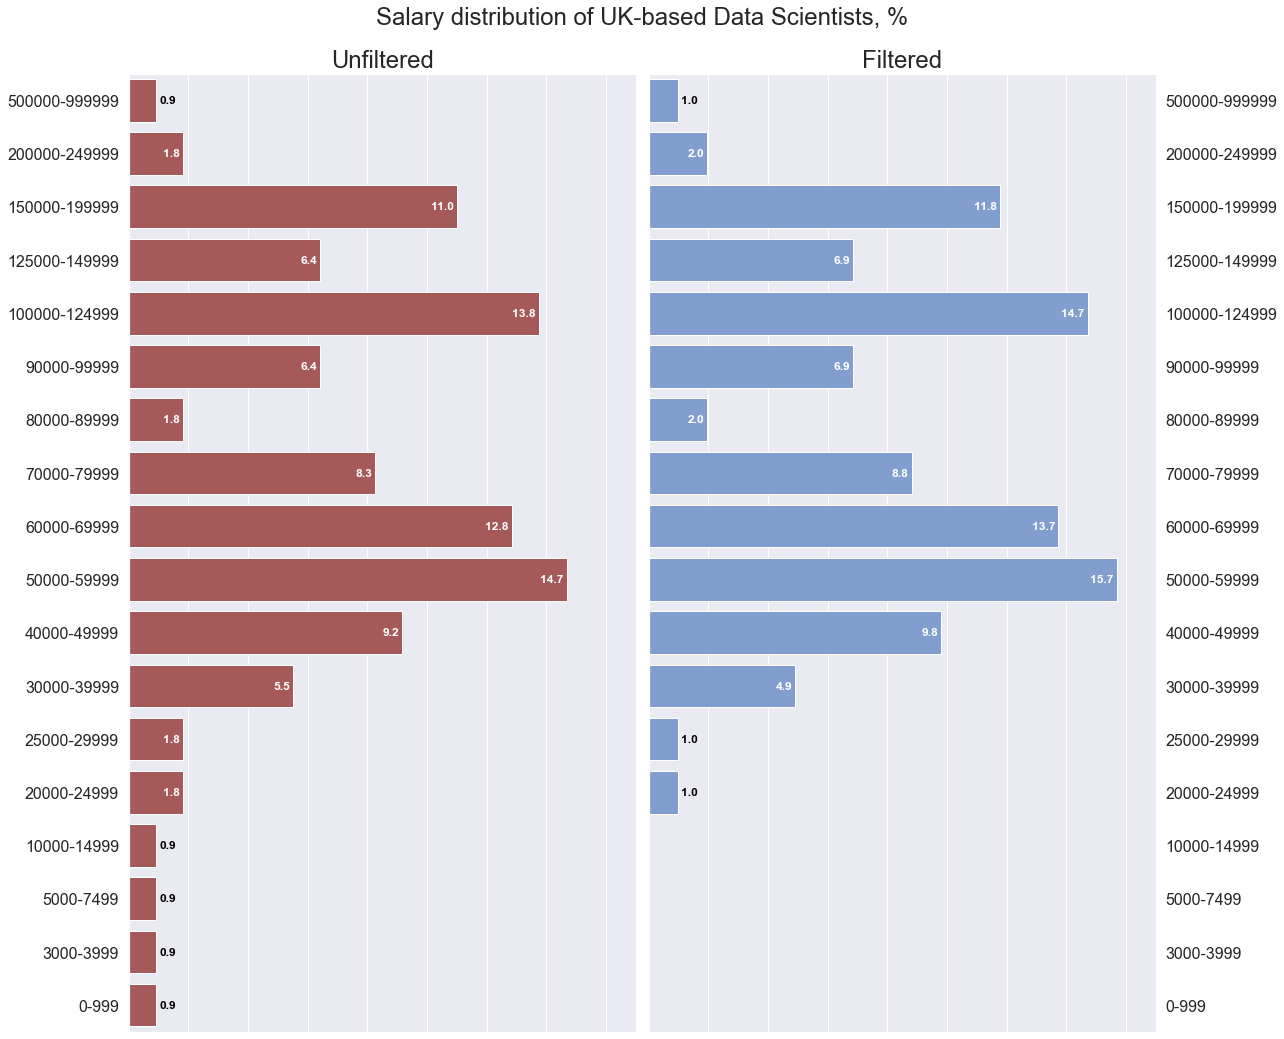

In [103]:
country = "UK"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=18,
    height=14,
    x1_limit=(0, 17),
    x2_limit=(0, 17),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

## Brazil salary distribution

Brazil is classified by the World Bank as an "Upper middle" income country.  The salary distribution is significantly different than the other countries we examined so far. We see that the majority of observations are in the 10k-59999 range and observation are more evenly distributed in the 10k to 40k range. The graph indicates that some possible spam and unacceptable values remain in the "2000-2999" and "3000-3999" bins.

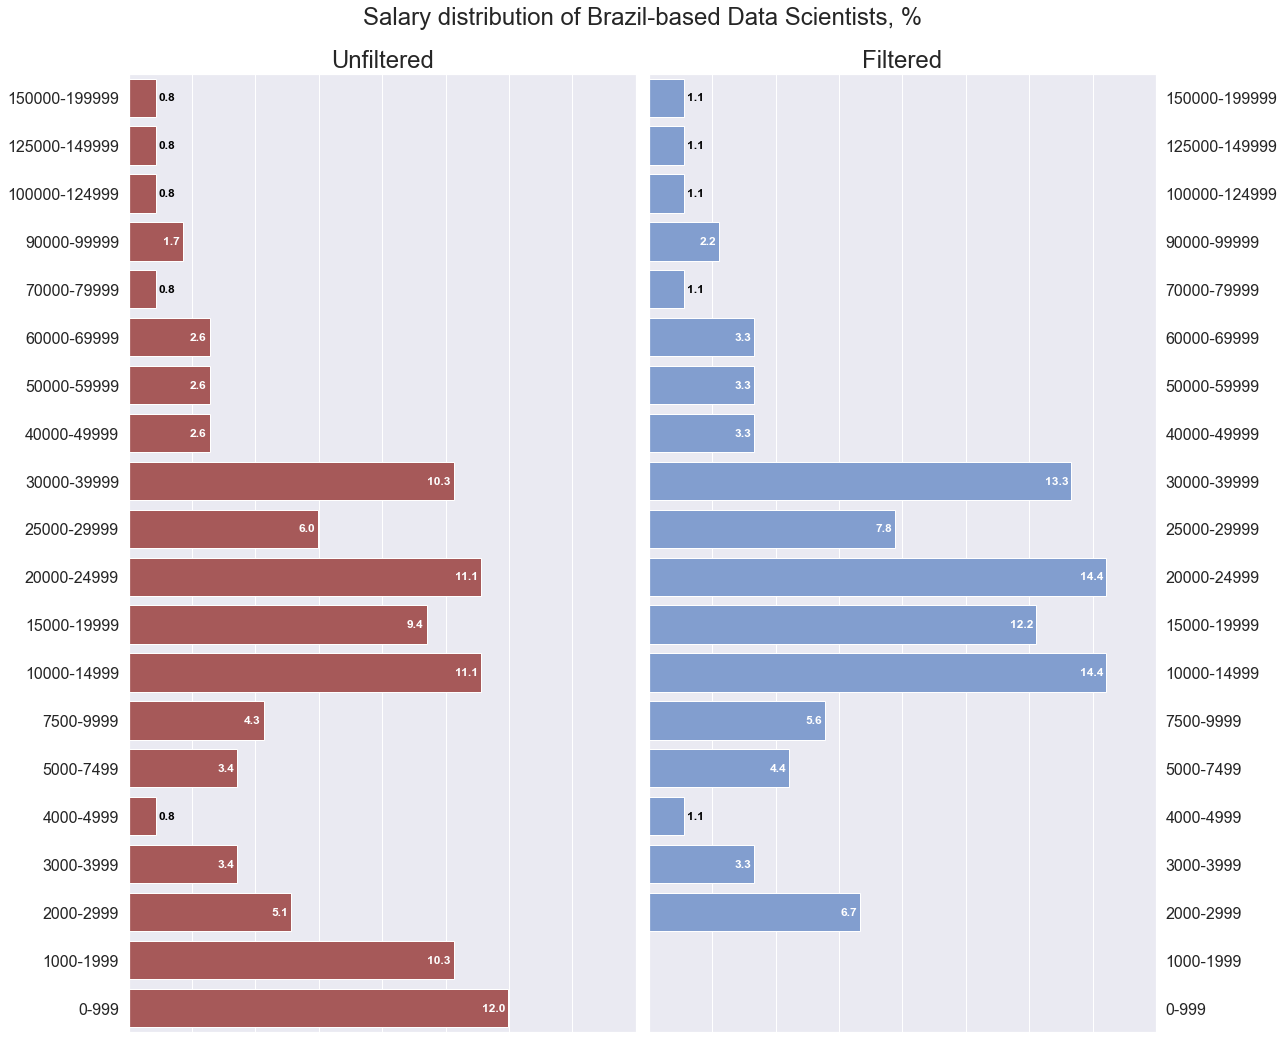

In [104]:
country = "Brazil"
dataset1 = uds[uds.country == country]
dataset2 = fds[fds.country == country]

kglib.sns_plot_global_salary_distribution_comparison(
    dataset1,
    dataset2,
    width=18,
    height=14,
    x1_limit=(0, 16),
    x2_limit=(0, 16),
    title=f"Salary distribution of {country}-based Data Scientists, %"
)

## Salary Medians comparison

Comparing the median salaries of the filtered versus the unfiltered data we find significant differences for most countries.  Taking the bin midpoints, we find that the median salary of the filtered dataset is:

- 44% greater in Japan,
- 22% greater in France,
- double in Russia, Brazil and India,

This graph confirms the significant difference between the US and other countries, in terms of Data Scientists salary.  
There results are similar for the whole data set and not only for Data Scientists.

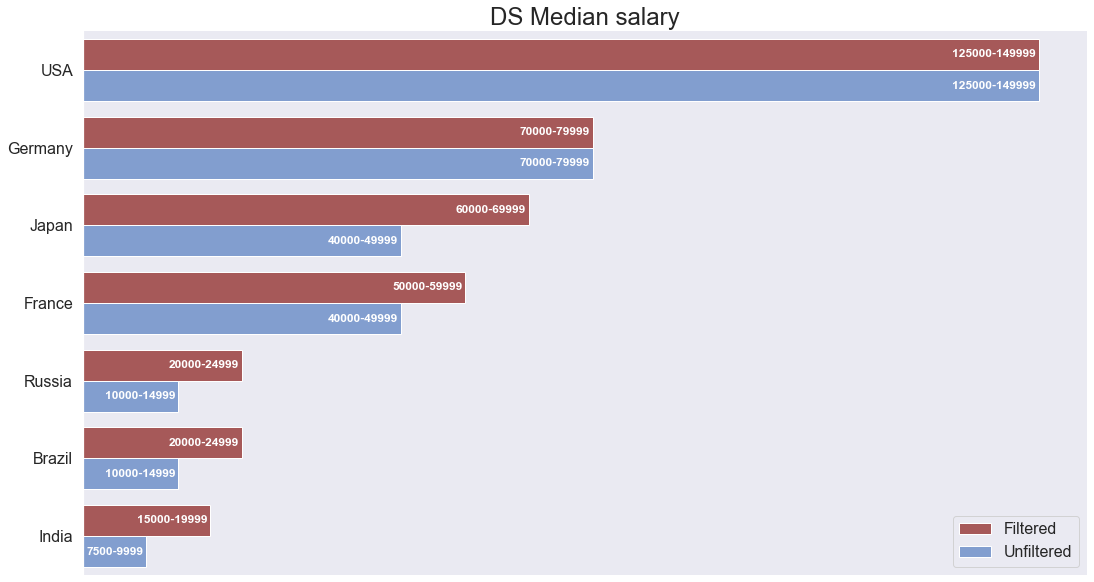

In [105]:
dataset1=uds
dataset2=fds
countries = ["USA", "Germany", "Japan", "France", "Russia", "Brazil", "India"]

df = kglib.load_salary_medians_df(
    dataset1=uds,
    dataset2=fds,
    label1="Unfiltered",
    label2="Filtered",
    countries=countries,
)

kglib.sns_plot_value_count_comparison(
    df=df, 
    width=18, 
    height=10, 
    orientation="h", 
    order_by_labels=False,
    annotation_mapping=kglib.REVERSE_SALARY_THRESHOLDS,
    title="DS Median salary"
)

## Salary distributions for country "Income groups"

Since the global salary distribution is so diverse, we group countries according to the [World Bank (WB) "Income group" definition](https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021).  It should be noted that even though this aggregation is informative,  the groups consist of countries with wide economic differences.  For example, the "High Income" group includes Romania, Portugal, Germany, Switzerland *and* the USA.

Ploting the salary by country income groups we get an informative decomposition of the distribution, in contrast to the "everything goes" global view. We find that the US is a class of its own exhibiting quite higher values than the rest of the "High Income" countries. This confirms that the USA merits a distinct examination and that, at the same time, when making inferences about the Rest of the World (RoW) USA should be excluded.  Therefore, the "High Income" group in this graph excludes the USA. 

Similarly, since India comprises one fifth of the dataset, we examine it separately and exclude it from the "Lower Middle" countries group to assess whether that makes a difference.

The key findings of this analysis are:

- USA salaries distribution appears to be much higher than the rest of the "High Income countries".
- The "High Income" group salaries distribution appears to be after the mode of the "Upper Middle" income group.
- The "Upper Middle" group distribution mode is positioned at the salary level of the mimimun outliers of the "High Income" distribution.
- India is somewhere in the middle between "Upper Middle" and "Lower Middle" income group.  
- The "Lower Middle" income group salary levels are distributed mostly to lower salary bins. The lower values might be related to spam or to countries with very low salary levels.

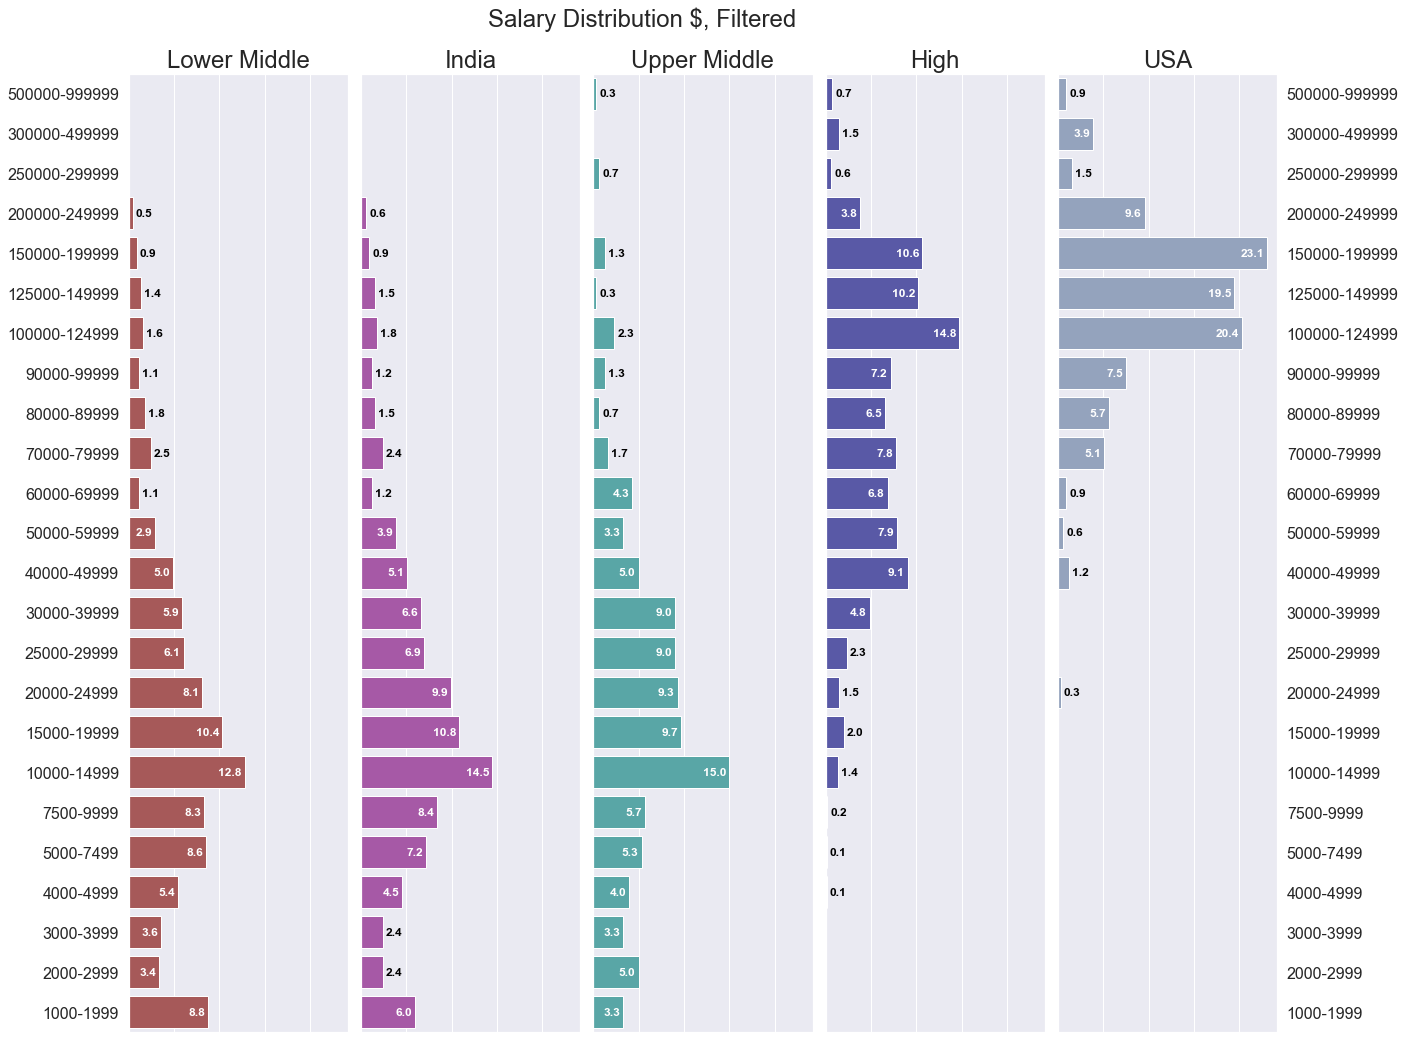

In [106]:
main_dataset = fds

# Exclude "Other"
dataset = main_dataset[main_dataset.country != "Other"]

datasets = {
    "Lower Middle": dataset[dataset.income_group.str.startswith("1")],
    "India": dataset[dataset.country == "India"],
    "Upper Middle": dataset[dataset.income_group.str.startswith("2")],
    "High": dataset[dataset.income_group.str.startswith("3")],
    "USA": dataset[dataset.country == "USA"],
}

salary_distributions = [kglib.get_salary_distribution(df, name=name) for (name, df) in datasets.items()]
df = kglib.multi_merge(dataframes=salary_distributions, on="salary", how="outer")
df = df.set_index("salary").sort_index(key=natsort.natsort_key, ascending=False)

kglib.sns_plot_salary_distribution_comparison(
    df=df,
    width=18,
    height=14,
    title="Salary Distribution $, Filtered"
)

## 6. Impact of Experience on DS Salaries

### Impact of Coding XP on DS Salary

- Data Scientists salaries increase significantly with experience.
- High experienced Data Scientists from USA earn almost double than their colleagues in UK and Germany, which are countries with similar price levels.

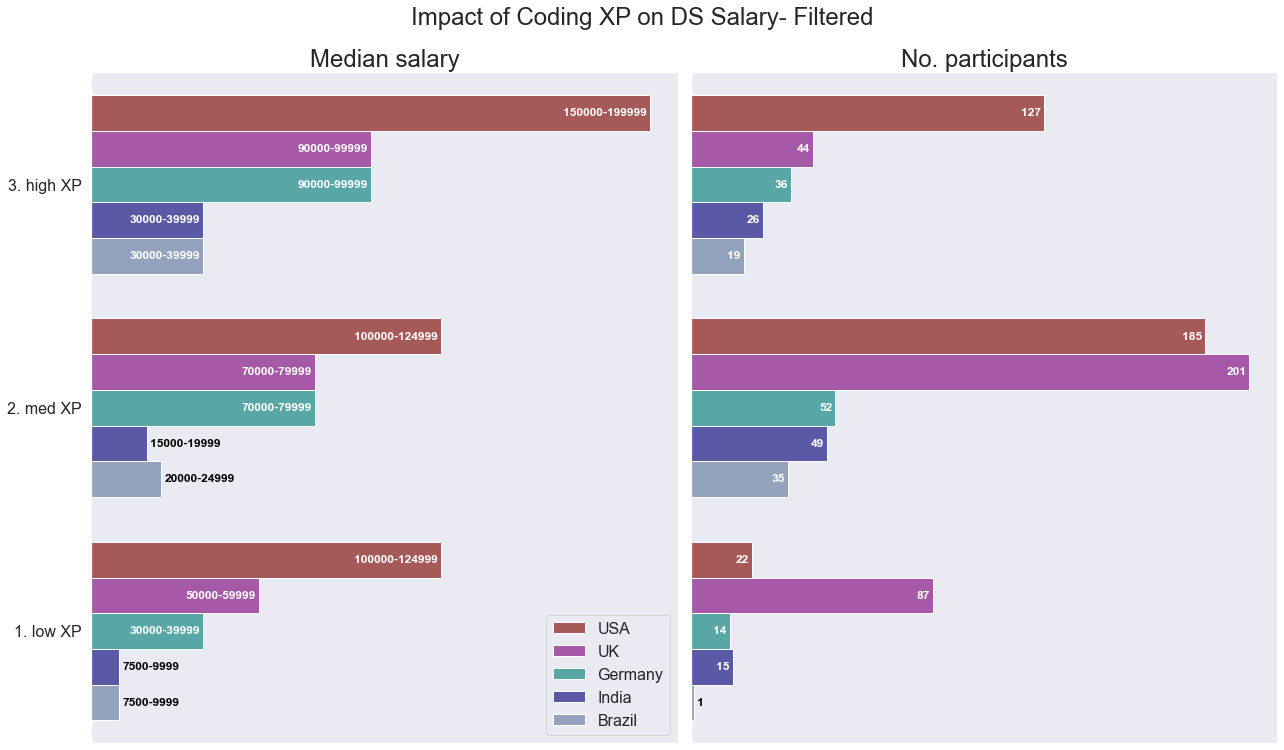

In [107]:
reload_kglib()

dataset = fds
column = "code_level"
countries = ['Brazil', 'India', 'Germany', 'UK', 'USA'][::-1]

no_participants_df = kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=True)
median_salary_df = kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=False)
no_participants_df = no_participants_df.sort_values([column, "no_participants"], ascending=False)
median_salary_df = median_salary_df.sort_values([column, "salary_threshold"], ascending=False)

kglib.sns_plot_participants_vs_median_salary(
    no_participants_df=no_participants_df,
    median_salary_df=median_salary_df,
    width=18,
    height=10,
    title="Impact of Coding XP on DS Salary, Filtered",
)

### Impact of ML experience on DS salary

- Data Scientists salaries increase significantly with Machine Learning experience.
- The gap between salaries in USA and UK and Germany is smaller for Data Scientists with high Experience in Machine Learning. 
- It should be noted that, with the exception of USA, the number of highly experienced participants is rather low which reduces the confidence about the median values.

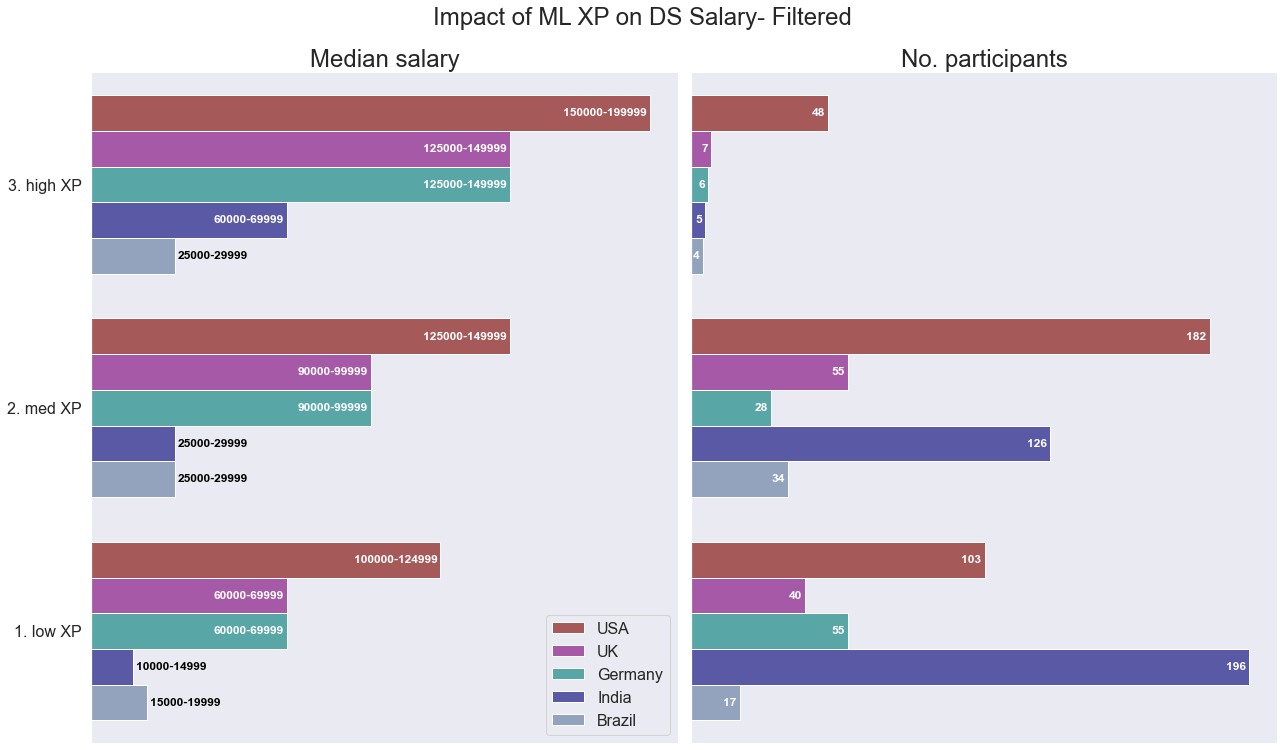

In [108]:
reload_kglib()

dataset = fds
column = "ml_level"
countries = ['Brazil', 'India', 'Germany', 'UK', 'USA'][::-1]

no_participants_df = kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=True)
median_salary_df = kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=False)
no_participants_df = no_participants_df.sort_values([column, "no_participants"], ascending=False)
median_salary_df = median_salary_df.sort_values([column, "salary_threshold"], ascending=False)

kglib.sns_plot_participants_vs_median_salary(
    no_participants_df=no_participants_df,
    median_salary_df=median_salary_df,
    width=18,
    height=10,
    title="Impact of ML XP on DS Salary, Filtered",
)

### Impact of Coding Experience on DS salary per income group

- There is a great gap (5x-10x) between the median salaries in USA and "Upper Middle" Income group countries regardless of the Experience Level. This difference cannot be explained just by differences in price levels.
- There is also a great gap, between the median salaries of "High Income" group and the "Middle" groups, although smaller than the one for "USA".

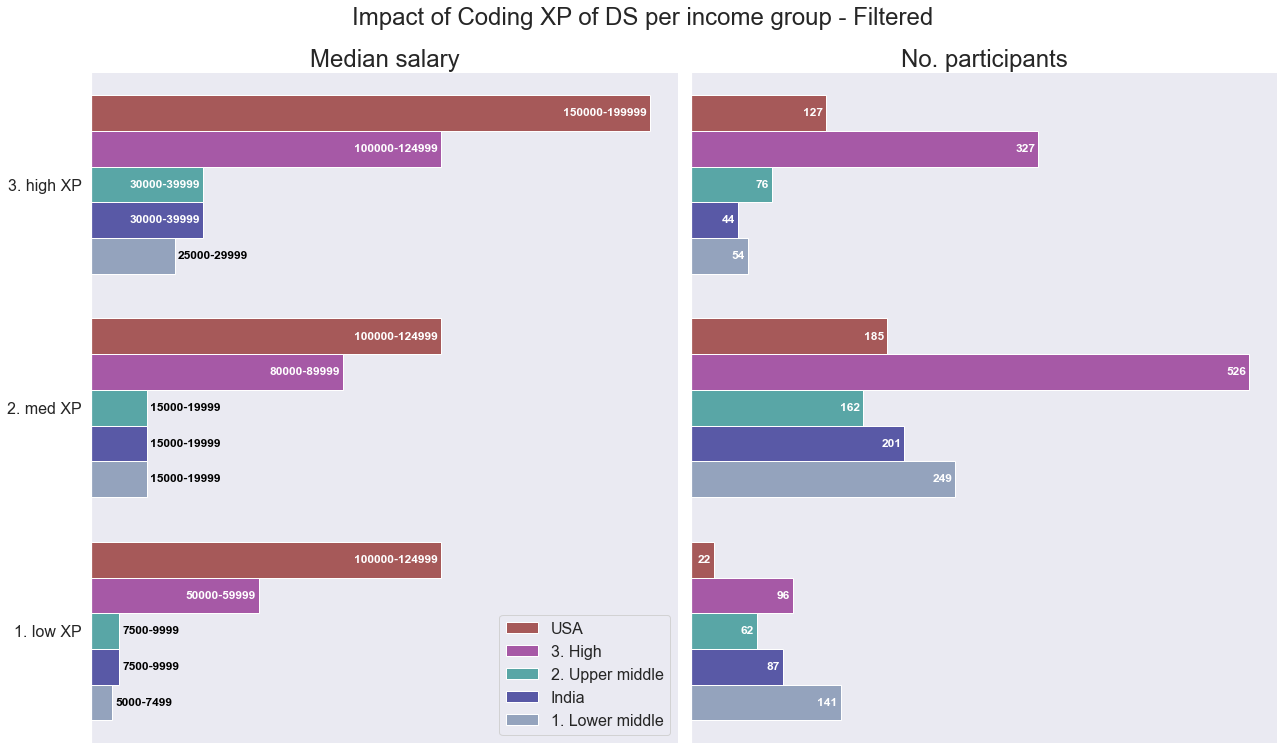

In [109]:
reload_kglib()

dataset = fds
column = "code_level"
countries = ["USA", "India"]

median_salary_df = pd.concat(
    (
        kglib.load_aggregate_per_XP_level_df(dataset, column=column, income_group="all", no_participants=False),
        kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=False),
    ),
    ignore_index=True,
).sort_values([column, "salary_threshold"], ascending=False)

#median_salary_df.head()

no_participants_df = pd.concat(
    (
    kglib.load_aggregate_per_XP_level_df(dataset, column=column, income_group="all", no_participants=True),
    kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=True),
    ),
    ignore_index=True,
).reindex(median_salary_df.index)

kglib.sns_plot_participants_vs_median_salary(
    no_participants_df=no_participants_df,
    median_salary_df=median_salary_df,
    width=18,
    height=10,
    title="Impact of Coding XP of DS per income group, Filtered",
)

### Impact of Machine Learning Experience on DS salary per income group

- For all experience levels, experience in Machine Learning appears to be more handsomely compensated than Coding Experience.
- The median salaries for highly experienced Data Scientists in Machine Learning in "India" and "Lower Middle" income groups is probably overestimated due to the small sample size. It probably is, no more than the median salary of the "Upper Middle" income group.
- Other than that, there appear to be no significant diferrences between the "Lower" and "Upper" Middle income groups.

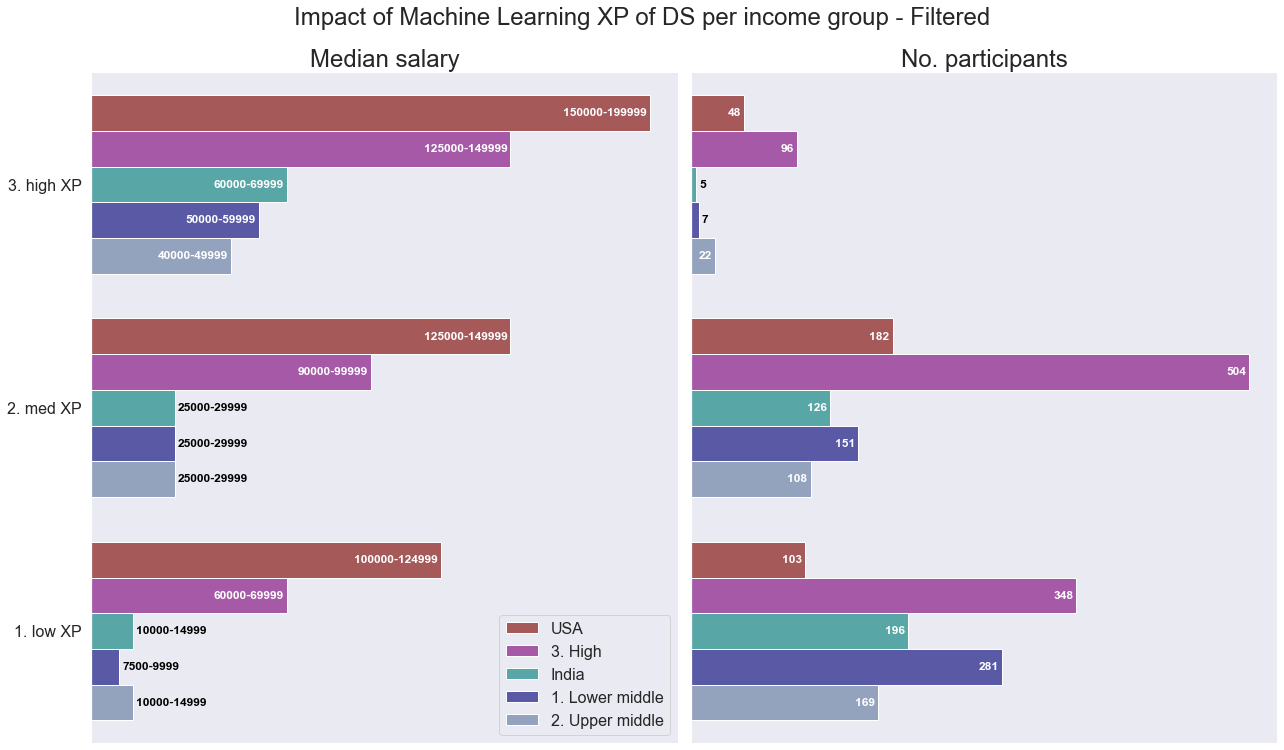

In [110]:
reload_kglib()

dataset = fds
column = "ml_level"
countries = ["USA", "India"]

median_salary_df = pd.concat(
    (
        kglib.load_aggregate_per_XP_level_df(dataset, column=column, income_group="all", no_participants=False),
        kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=False),
    ),
    ignore_index=True,
).sort_values([column, "salary_threshold"], ascending=False)

#median_salary_df.head()

no_participants_df = pd.concat(
    (
    kglib.load_aggregate_per_XP_level_df(dataset, column=column, income_group="all", no_participants=True),
    kglib.load_aggregate_per_XP_level_df(dataset, column=column, countries=countries, no_participants=True),
    ),
    ignore_index=True,
).reindex(median_salary_df.index)

kglib.sns_plot_participants_vs_median_salary(
    no_participants_df=no_participants_df,
    median_salary_df=median_salary_df,
    width=18,
    height=10,
    title="Impact of Machine Learning XP of DS per income group, Filtered",
)


## Appendix A: Data cleaning methodology, assumption, datasets, functions


### Spam and user error filtering tolerance

The first thing that sticks out besides the "completion" time is the large number of observations with reported salaries in the 0-999 bin, regardless of country.  From the salary distributions graphs it becomes apparent that the dataset contains a large amount of "spam".  A simple approach would be a "brute-force" one, e.g. to drop all observations that report salaries below 2000 USD for all "Upper Middle" and "High Income" countries. Nevertheless, given the wide variety of other "unacceptable values" in different dimensions and the wide cross-country economic differences, we chose to construct country-adjusted rejection thresholds.

As a general rule for this analysis, and in order not to lose information about an arguably high variance dataset, we set as a goal to avoid dropping observations that could be falsely identified as spam, i.e. we want minimum False Positives.  Consequently, observations that should be dropped remain in the dataset, i.e we acknowledge that our filters will allow false Negatives (i.e. observations that are classified as non-spam, despite being spam).  This decision intentionally sacrifices accuracy for retaining valuable information.
    
Our method, analysis and results are unique and diverge significantly with the Kaggle "Executive Summary" and all other EDAs that do not filter the data despite allowing false Negative values.

### Average salary approximation datasets

To select a reliable salary cut-off threshold, we use a step by step approach. In order to avoid dropping possible outliers we take a conservative approach. First of all, we combine a comprehensive set of data sources to obtain an approximation for the annual average salary for each country: `country_avg_salary`. To counter lack of official data on average salary and cross-validate our approach, we combine different datasets:

- We group the countries according to the [Income groups defined by World Bank](https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021).

- For countries in the European Union, we [use Eurostat data](https://ec.europa.eu/eurostat/databrowser/view/EARN_NT_NET__custom_414315/default/table?lang=en).  This dataset contains 3 series: "Gross", "Net" and "Total". We use the more relevant one: "Gross Annual Earnings of single person, without children, earning 100% of the average earning, 2019, euro" which includes income before taxes and without social welfare transfers. For a detailed account on Eurostat definitions please visit the official Eurostat [site.](https://ec.europa.eu/eurostat/cache/metadata/en/earn_net_esms.htm)

- We convert euro values to USD, using the average 2019 exchange USD to EUR rate from the European Central Bank (ECB).

- For all the remaining countries, we use the [World Bank Gross National Income per capita (GNI pc), current USD](https://data.worldbank.org/indicator/NY.GNP.PCAP.CD) series, which is the measure used by the [World Bank to define country "Income groups".](https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined)

- The [OECD data](https://stats.oecd.org/Index.aspx?DatasetCode=AV_AN_WAGE) which are reported in PPP units,

- We also use data from [ILO](https://ilostat.ilo.org/topics/wages/). Nevertheless, but this dataset contains many outdated or missing values. 

- Finally, we also use the unofficial [numbeo.com](https://www.averagesalarysurvey.com/india) or [averagesalarysurvey.com](https://www.averagesalarysurvey.com/india) data for cross-validation purposes.

### Cross validation

After using our combined dataset we found many invalid entries in the ILO dataset. For example:

In [111]:
ilo = kglib.load_ilo_df()

ilo[ilo.index.isin(["Poland", "Nigeria", "Sudan", "UK"])]

,year,ilo
country,,
UK,2017,36156.0
Nigeria,2013,32985.6
Poland,2019,1281.6
Sudan,2011,34371.6


Furthermore, the GNI per capita and the GDP per capita may me skewed. More specifically:

- For states with small total population and developed high-salary sectors the datasets may be skewed towards higher income values.
- On the other hand, for countries with very large population which are in the "Low Icome" and "lower Middle Income" groups with a higher percentage of unskilled labour, the national aggregates are biased heavily towards smaller values.  This effect adds spam tolerance to our method.

As the ILO database demonstrates, data (official or not) should be examined with caution and should not be taken as undeniable facts. The unofficial data in popular webpages suggest much higher income levels for countries that are have the lowest GNI pc in the Survey. 

The numbeo data for the average salary are reported in Net Units (After Tax) which means that the gross value is higher. In some of the countries we examined, the Net average salary provided by numbeo is two times or more higher than the WB GNI pc index and the gross average salry should be even higher.

In [112]:
very_low_gni_pc_countries = survey_salary_comparison[(survey_salary_comparison.country_avg_salary < 2500)] # 2500 *0.4 = 1000
# very_low_gni_pc_countries
very_low_gni_pc_countries_list = very_low_gni_pc_countries.country.unique()
# very_low_gni_pc_countries_list

low_salary_countries_df = survey_salary_comparison[survey_salary_comparison.country.isin(very_low_gni_pc_countries_list)]

low_salary_countries_df = low_salary_countries_df.assign(
    WB_numbeo_percent_diff=(
        low_salary_countries_df.numbeo / low_salary_countries_df.wb_gni_pc_atlas
    )
)

low_salary_countries_df

,country,income_group,eurostat,wb_gni_pc_atlas,wb_gdp_pc,oecd_ppp,ilo,numbeo,country_avg_salary,WB_numbeo_percent_diff
15,Bangladesh,1. Lower middle,NaN,1940.0,1855.739824,NaN,1792.8,3521.64,1940,1.815278
74,Ghana,1. Lower middle,NaN,2220.0,2202.115567,NaN,1899.6,NaN,2220,NaN
89,India,1. Lower middle,NaN,2120.0,2099.599048,NaN,NaN,5375.88,2120,2.535792
101,Kenya,1. Lower middle,NaN,1750.0,1816.546916,NaN,NaN,4654.56,1750,2.659749
138,Nepal,1. Lower middle,NaN,1090.0,1071.050761,NaN,2044.8,2428.56,1090,2.228037
144,Nigeria,1. Lower middle,NaN,2030.0,2229.858696,NaN,32985.6,2184.24,2030,1.075980
149,Pakistan,1. Lower middle,NaN,1410.0,1284.702041,NaN,1898.4,2657.28,1410,1.884596


Our decision to set the lower rejection thrshold at 1000 USD was influenced by the wide difference between numbeo.com and World Bank GNI, in combination with the properties of the GNI index that we discussed previously.  In any case, our goal is not to give an estimation of the average salary of countries in the Survey, but to set a lenient threshold with respect to occupations in the Survey, in order to clean the data and describe them afterwards.

We compare the selected average salary with:

- the WB Gross Domestic Product per capita (GDP pc),
- with OECD average salary data,
- which are reported in Purchasing Power Parity (PPP) units,
- International Labour Organizaton average salary data 
- and with unofficial "numbeo" data.  

Concerning the [OECD data](https://stats.oecd.org/Index.aspx?DatasetCode=AV_AN_WAGE) which are reported in PPP units, this leads to over or under estimation of the average salary depending on the country price level.  For countries with high price levels, the PPP OECD reported values are lower than the actual current nominal salary.  Conversely, for countries with low price levels, the PPP OECD reported values are much higher than the actual current nominal salary.  The only OECD country not in the WB "High Income" group is Mexico.  We use the OECD PPP data to assess to what degree the a country's price level may explai explain 

Due to lack of available data in International Organizations for Taiwan, we made a single exception and used numbeo data. We would like to hear your view on the selected average salary with respect to Data Scientists or other survey related occupations.

For the Islamic Republic of Iran, the World Bank reports the 2018 value, so we have no other option but to use the 2018 value.

### Average Salary assumptions

Undoubtly, an average salary comprises a range of values that fluctuate for a number of reasons, related to age, experience, cross-sectoral and within-sectoral differences, geographical differences within the same country and generally related to a whole range of factors that are beyond our scope to examine.  While it is expected that "in average" the salaries of occupation in this survey will be higher than the country average and the GNI pc, we intentionally do not adjust the salary threshold upwards but downwards to a considerable degree.

# Appendix B. Setting arguments in the filtering function and related data exploraton functions.

As mentioned above, the data are filtered using a dedicated function that could easily be parameterized by:

- setting a stricter (higher) or more lenient (lower) value for the `low_salary_percentage` argument. 
- setting a different value in the `threshold_offset` argument,
- adjusting what is considered to be high or low experience. E.g iclude 5-10 years in High Experience Category.
- adjusting the general lower cut-off threshold from 1000 USD to 2000 USD.

# Appendix C: Data Analysis driven suggestions for future Kaggle Surveys.

1. Set a mimimum time rejection limit and a maximum "timeout" limit.
2. Request Age input as integer values.
3. Education - titles. Ask separate questions about obtained titles.
4. Education - current studies. Ask separate questions about current studies.
5. Education - future plans. If that is important for the scope of the Survey ask seperate questions.
6. If employeed first ask about full or part-time employment.
7. Request Monthly instead of Yearly salary and provide hints to participants.
8. Request Salary input as integer values instead of choosing a range.
9. Request XP input as integer values instead of choosing a range.
10. This is not always True: Non-professionals were defined as students, unemployed, and respondents that have never spent any money in the cloud.